In [501]:
import warnings
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
from sklearn.cluster import AgglomerativeClustering
# from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from math import pi

# NHL draft 1963 - 2022 dataset

## The stats were made till year 2022
## So the season 202/23 ; 2023/24 and 2024/25 are not counting

### The dataset contains every player drafted in the NHL Draft from (1963 - 2022).

### The data was collected from Sports Reference then cleaned for data analysis.

##### Tabular data includes:

year: Year of draft
overall_pick: Overall pick player was drafted
team: Team player drafted to
player: Player drafted
nationality: Nationality of player drafted
position: Player position
age: Player age
to_year: Year draft pick played to (This field indicates where player leave NHL; if he played some games in NHL and where the last stast of playerd were collected)
        - if player has in this column NULL (it means that he hasn;t played any match in HNL till 2022 or was drafted in year 2022 and later)
amateur_team: Amateur team drafted from
games_played: Total games played by player (non-goalie)
goals: Total goals
assists: Total assists
points: Total points
plus_minus: Plus minus of player
penalties_minutes: Penalties in minutes
goalie_games_played: Goalie games played
goalie_wins
goalie_losses
goalie_ties_overtime: Ties plus overtime/shootout losses
save_percentage
goals_against_average
point_shares

### Load data from file

In [502]:
df = pd.read_csv('./nhl_draft.csv')
df.head()

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,...,points,plus_minus,penalties_minutes,goalie_games_played,goalie_wins,goalie_losses,goalie_ties_overtime,save_percentage,goals_against_average,point_shares
0,1,2022,1,Montreal Canadiens,Juraj Slafkovsky,SK,LW,18.0,NaN,TPS (Finland),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2022,2,New Jersey Devils,Simon Nemec,SK,D,18.0,NaN,HK Nitra (Slovakia),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2022,3,Arizona Coyotes,Logan Cooley,US,C,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022,4,Seattle Kraken,Shane Wright,CA,C,18.0,NaN,Kingston Frontenacs (OHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2022,5,Philadelphia Flyers,Cutter Gauthier,SE,LW,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Display info about about columns data types

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12250 non-null  int64  
 1   year                   12250 non-null  int64  
 2   overall_pick           12250 non-null  int64  
 3   team                   12249 non-null  object 
 4   player                 12250 non-null  object 
 5   nationality            12246 non-null  object 
 6   position               12223 non-null  object 
 7   age                    8291 non-null   float64
 8   to_year                5246 non-null   float64
 9   amateur_team           12250 non-null  object 
 10  games_played           5246 non-null   float64
 11  goals                  5246 non-null   float64
 12  assists                5246 non-null   float64
 13  points                 5246 non-null   float64
 14  plus_minus             5234 non-null   float64
 15  pe

### Describe of each feature
- mean -> the average value of each column
- std (standart deviation) ->  

In [504]:
df.describe().style.background_gradient(cmap = "Blues")

,id,year,overall_pick,age,to_year,games_played,goals,assists,points,plus_minus,penalties_minutes,goalie_games_played,goalie_wins,goalie_losses,goalie_ties_overtime,save_percentage,goals_against_average,point_shares
count,12250.000000,12250.000000,12250.000000,8291.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5234.000000,5246.000000,490.000000,488.000000,488.000000,488.000000,488.000000,490.000000,5246.000000
mean,6125.500000,1996.250122,116.633143,18.675793,2004.222074,305.384102,50.858940,85.037743,135.896493,-2.282767,245.281357,181.300000,77.971311,69.196721,21.315574,0.886836,3.375857,17.359112
std,3536.414733,14.733847,72.030642,1.328110,14.303401,346.748283,94.060512,144.246996,232.821818,51.247311,409.171631,229.950359,109.048598,85.677984,28.479086,0.051013,1.797891,29.115392
min,1.000000,1963.000000,1.000000,16.000000,1968.000000,1.000000,0.000000,0.000000,0.000000,-257.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,-10.100000
25%,3063.250000,1984.000000,55.000000,18.000000,1993.000000,25.000000,0.000000,2.000000,3.000000,-17.000000,8.000000,7.000000,2.000000,3.000000,1.000000,0.875750,2.710000,0.100000
50%,6125.500000,1996.000000,112.000000,18.000000,2006.000000,151.500000,9.000000,18.000000,28.000000,-2.000000,65.000000,74.000000,23.500000,32.000000,9.000000,0.895000,3.100000,3.300000
75%,9187.750000,2008.000000,174.000000,19.000000,2017.750000,521.000000,56.000000,107.000000,166.000000,1.000000,311.000000,294.000000,117.000000,112.250000,33.000000,0.908000,3.697500,22.400000
max,12250.000000,2022.000000,293.000000,37.000000,2022.000000,1779.000000,780.000000,1249.000000,1921.000000,722.000000,3971.000000,1266.000000,691.000000,397.000000,154.000000,1.000000,27.270000,242.700000


## Categorical data

In [505]:
# select only categorical features
qualitative_columns = df.select_dtypes(exclude=[np.number]).columns
for col in qualitative_columns:
    if df[col].isnull().any():
        df[col].fillna('MISSING')

qualitative_columns

Index(['team', 'player', 'nationality', 'position', 'amateur_team'], dtype='object')

# Task 1 (15p)
## The first is about performing an EDA over the assigned dataset to get an insight about the dataset
## Exploratory data analysis for assigned dataset.
## Description of data and your work containing hypotesis/answers.
## Visualizations and result's explanation.
## 📒 Comment your analysis insight gained in a Markdown cells

In [506]:
print(df.columns)

Index(['id', 'year', 'overall_pick', 'team', 'player', 'nationality',
       'position', 'age', 'to_year', 'amateur_team', 'games_played', 'goals',
       'assists', 'points', 'plus_minus', 'penalties_minutes',
       'goalie_games_played', 'goalie_wins', 'goalie_losses',
       'goalie_ties_overtime', 'save_percentage', 'goals_against_average',
       'point_shares'],
      dtype='object')


### Display number of values which are missing 

In [507]:
# Checking for empty values
df.isnull().sum().sort_values(ascending=False)

save_percentage          11762
goalie_ties_overtime     11762
goalie_losses            11762
goalie_wins              11762
goals_against_average    11760
goalie_games_played      11760
plus_minus                7016
goals                     7004
assists                   7004
penalties_minutes         7004
points                    7004
point_shares              7004
games_played              7004
to_year                   7004
age                       3959
position                    27
nationality                  4
team                         1
year                         0
amateur_team                 0
player                       0
overall_pick                 0
id                           0
dtype: int64

In [508]:
# Data types
df.dtypes.head(20)

id                        int64
year                      int64
overall_pick              int64
team                     object
player                   object
nationality              object
position                 object
age                     float64
to_year                 float64
amateur_team             object
games_played            float64
goals                   float64
assists                 float64
points                  float64
plus_minus              float64
penalties_minutes       float64
goalie_games_played     float64
goalie_wins             float64
goalie_losses           float64
goalie_ties_overtime    float64
dtype: object

## Values description

In [509]:
# stats
df.describe()

,id,year,overall_pick,age,to_year,games_played,goals,assists,points,plus_minus,penalties_minutes,goalie_games_played,goalie_wins,goalie_losses,goalie_ties_overtime,save_percentage,goals_against_average,point_shares
count,12250.000000,12250.000000,12250.000000,8291.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5234.000000,5246.000000,490.000000,488.000000,488.000000,488.000000,488.000000,490.000000,5246.000000
mean,6125.500000,1996.250122,116.633143,18.675793,2004.222074,305.384102,50.858940,85.037743,135.896493,-2.282767,245.281357,181.300000,77.971311,69.196721,21.315574,0.886836,3.375857,17.359112
std,3536.414733,14.733847,72.030642,1.328110,14.303401,346.748283,94.060512,144.246996,232.821818,51.247311,409.171631,229.950359,109.048598,85.677984,28.479086,0.051013,1.797891,29.115392
min,1.000000,1963.000000,1.000000,16.000000,1968.000000,1.000000,0.000000,0.000000,0.000000,-257.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,-10.100000
25%,3063.250000,1984.000000,55.000000,18.000000,1993.000000,25.000000,0.000000,2.000000,3.000000,-17.000000,8.000000,7.000000,2.000000,3.000000,1.000000,0.875750,2.710000,0.100000
50%,6125.500000,1996.000000,112.000000,18.000000,2006.000000,151.500000,9.000000,18.000000,28.000000,-2.000000,65.000000,74.000000,23.500000,32.000000,9.000000,0.895000,3.100000,3.300000
75%,9187.750000,2008.000000,174.000000,19.000000,2017.750000,521.000000,56.000000,107.000000,166.000000,1.000000,311.000000,294.000000,117.000000,112.250000,33.000000,0.908000,3.697500,22.400000
max,12250.000000,2022.000000,293.000000,37.000000,2022.000000,1779.000000,780.000000,1249.000000,1921.000000,722.000000,3971.000000,1266.000000,691.000000,397.000000,154.000000,1.000000,27.270000,242.700000


## Drafted number of players by nationality

In [510]:
# Count the number of players per nationality
nationality_counts = df['nationality'].value_counts()

# Display the counts
print("\nNumber of players per nationality:")
print(nationality_counts)


Number of players per nationality:
nationality
CA    6498
US    2639
SE     800
RU     724
FI     497
CZ     479
SK     166
DE      81
CH      73
LV      39
UA      33
BY      32
DK      27
KZ      24
NO      23
GB      22
AT      19
FR       9
SI       9
PL       8
HU       3
UZ       3
YU       3
LT       3
JP       3
IT       2
BR       2
BE       2
BS       2
KR       2
NG       2
EE       2
SU       2
AU       1
HT       1
TW       1
PY       1
ZA       1
ME       1
BN       1
TZ       1
TH       1
CN       1
NL       1
JM       1
VE       1
Name: count, dtype: int64


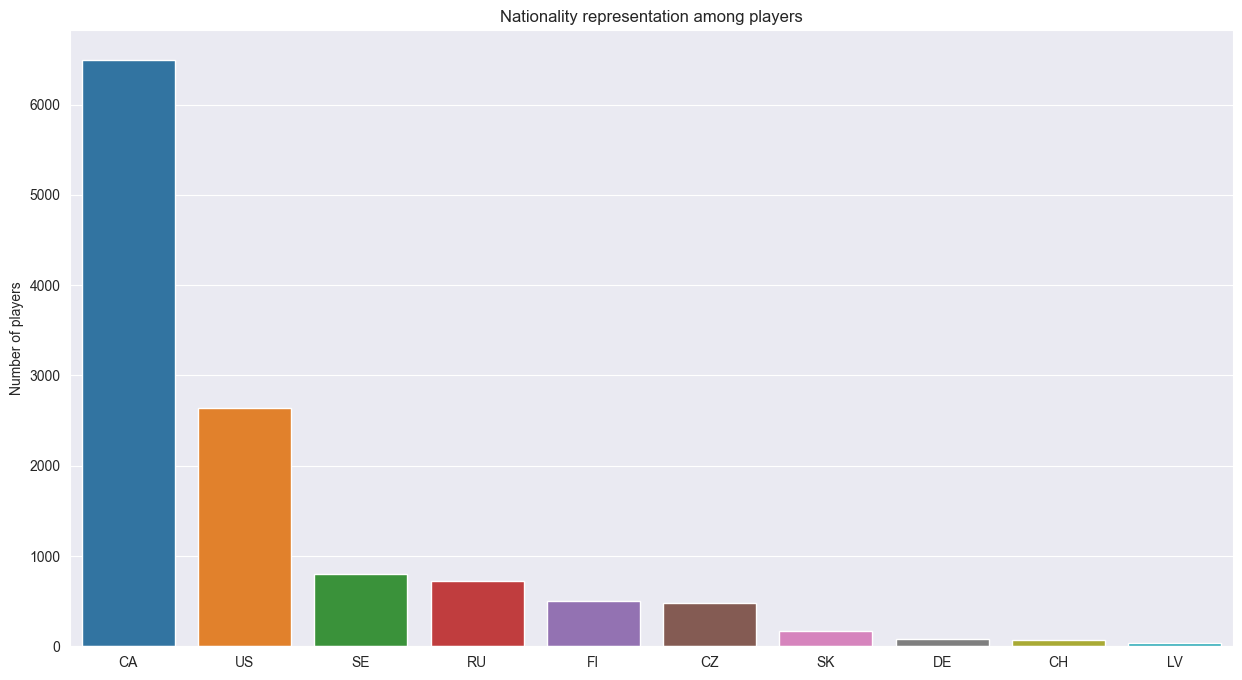

In [511]:
# Hypothesis:
# - Which country has the most players on the NHL drafts

nationality_counts = df['nationality'].value_counts().head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values, hue=nationality_counts.index)
plt.title('Nationality representation among players')
plt.ylabel('Number of players')
plt.xlabel('')
plt.show()

## Player with the most points till 2022

In [512]:
# display player with the most goals
most_points_player = df.loc[df["points"].idxmax()]

print("Player with Most Points:")
print(most_points_player[["goals", "assists", "points", "year", "nationality"]])

Player with Most Points:
goals           766.0
assists        1155.0
points         1921.0
year             1990
nationality        CZ
Name: 7676, dtype: object


In [513]:
# Jaromir jagr stats

jagr_stats = df[df["player"] == "Jaromir Jagr"]

# Display statistics for Jaromir Jagr
print(jagr_stats[["goals", "assists", "points"]])

      goals  assists  points
7676  766.0   1155.0  1921.0


## Display number of players by position

In [514]:
# Count the number of players per position
player_position_counts = df['position'].value_counts().head(5)

# Display the counts
print("\nPlayers position")
print(player_position_counts)


Players position
position
D     3966
C     2688
LW    2080
RW    2021
G     1217
Name: count, dtype: int64


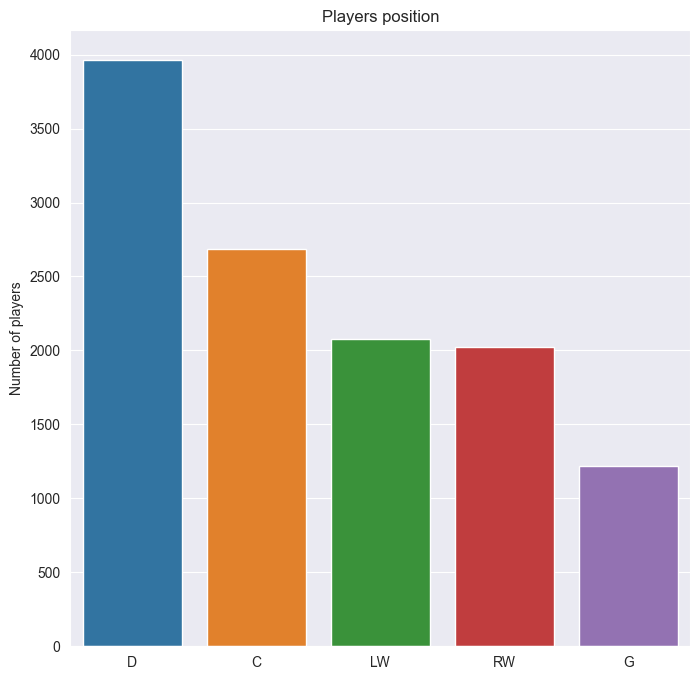

position
D        32.375510
C        21.942857
LW       16.979592
RW       16.497959
G         9.934694
C/LW      0.604082
C/RW      0.400000
W         0.359184
F         0.146939
LW/C      0.146939
LW/D      0.065306
RW/C      0.065306
D/LW      0.048980
C/D       0.040816
D/RW      0.032653
RW/D      0.024490
C/W       0.024490
C RW      0.016327
D/C       0.016327
C; LW     0.016327
C / R     0.016327
D/W       0.008163
Centr     0.008163
L/RW      0.008163
Name: count, dtype: float64


In [515]:
# Hypothesis:
# - Which players position if the most common
players_position_counts = df['position'].value_counts().head(5)

plt.figure(figsize=(8, 8))
sns.barplot(x=players_position_counts.index, y=players_position_counts.values, hue=players_position_counts.index)
plt.title('Players position')
plt.ylabel('Number of players')
plt.xlabel('')
plt.show()

# Display players position in percentage
print(df['position'].value_counts() / len(df['position']) * 100)

## Basic stats for every column / feature (Here are counted also players who never played any match in NHL)

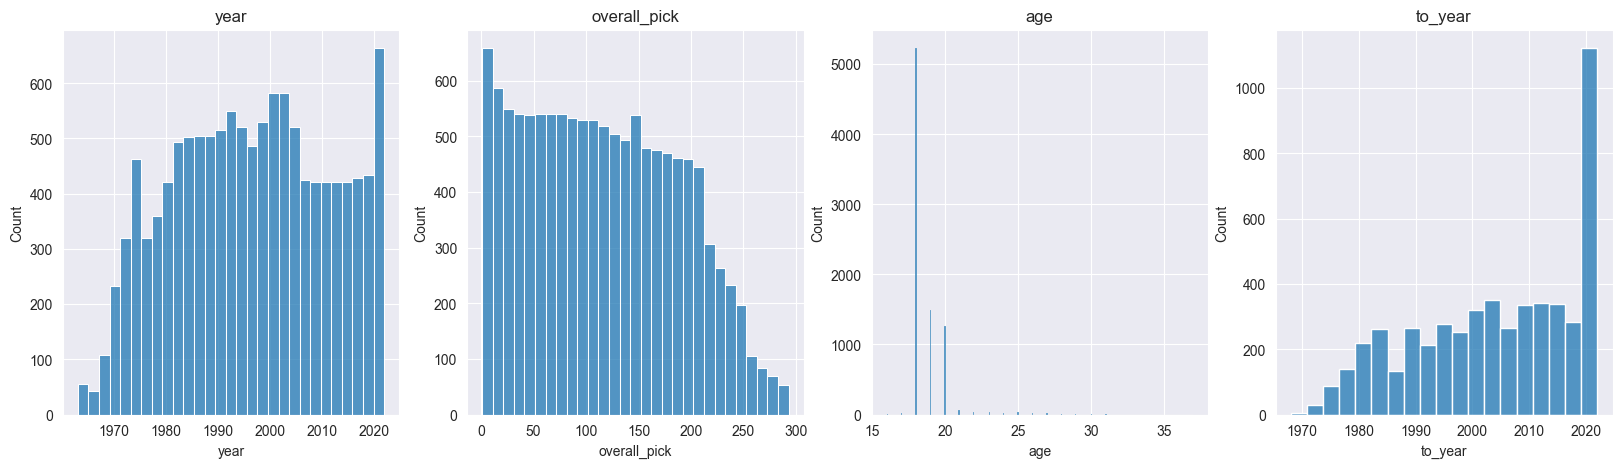

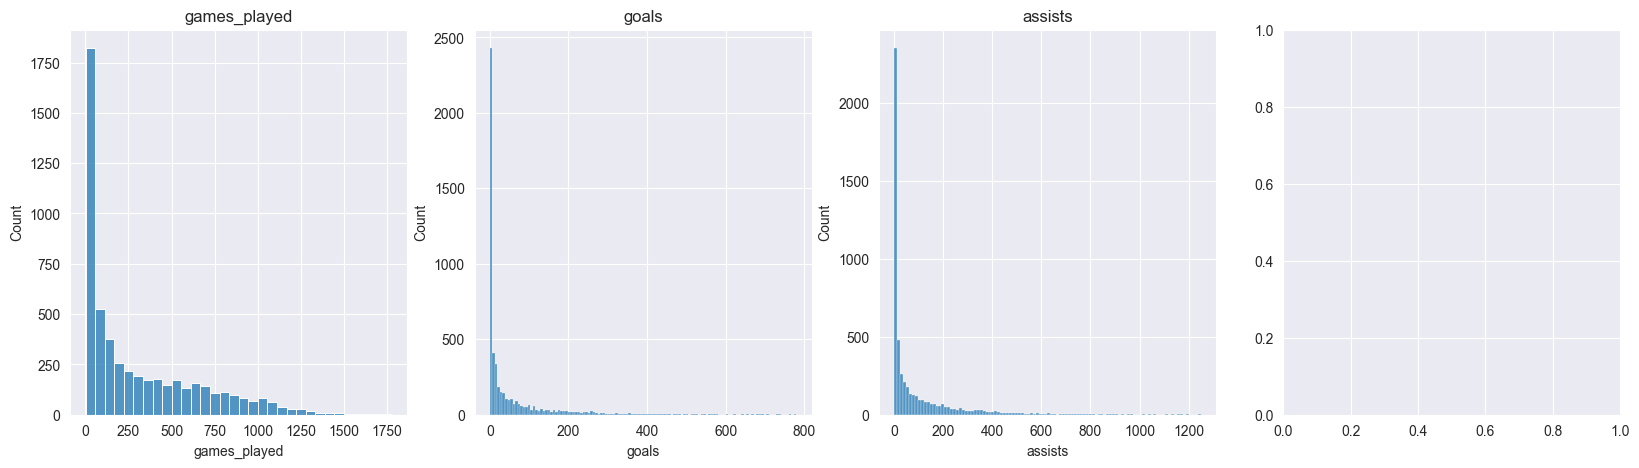

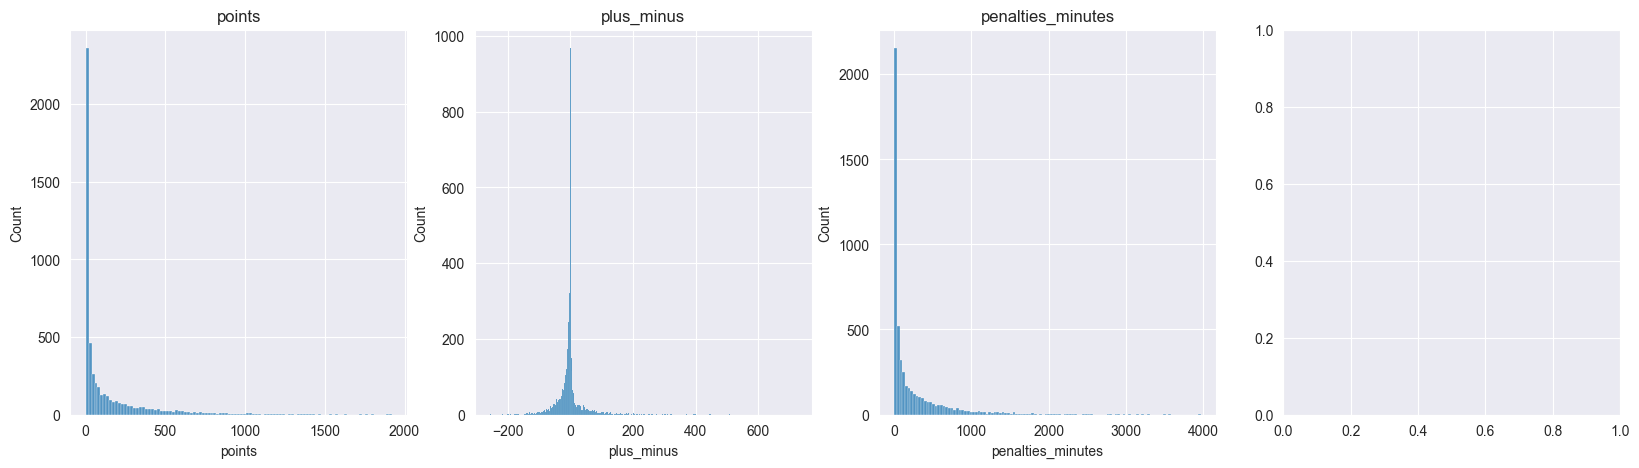

In [516]:
# Display some basic stats for every column
df_only_numeric = df.select_dtypes(np.number)
df_only_numeric = df_only_numeric.iloc[:, 1:5]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

df_only_numeric = df.select_dtypes(np.number)
df_only_numeric = df_only_numeric.iloc[:, 5:8]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

df_only_numeric = df.select_dtypes(np.number)
df_only_numeric = df_only_numeric.iloc[:, 8:11]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)
plt.show()

## Basic stats for every column / feature (Just players who played at least one match in NHL)

In [517]:
df.loc[df.games_played >=1, :]

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,...,points,plus_minus,penalties_minutes,goalie_games_played,goalie_wins,goalie_losses,goalie_ties_overtime,save_percentage,goals_against_average,point_shares
225,226,2021,1,Buffalo Sabres,Owen Power,CA,D,18.0,2022.0,Michigan (Big Ten),...,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9
226,227,2021,2,Seattle Kraken,Matthew Beniers,US,C,18.0,2022.0,Michigan (Big Ten),...,9.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9
227,228,2021,3,Anaheim Ducks,Mason Mctavish,CH,C,18.0,2022.0,Peterborough Petes (OHL),...,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4
229,230,2021,5,Columbus Blue Jackets,Kent Johnson,CA,C,18.0,2022.0,Michigan (Big Ten),...,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2
231,232,2021,7,San Jose Sharks,William Eklund,SE,LW,18.0,2022.0,Djurgardens IF (Sweden),...,4.0,-3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12229,12230,1963,1,Montreal Canadiens,Garry Monahan,CA,LW,16.0,1979.0,St. Michael's Majors (),...,285.0,-6.0,486.0,NaN,NaN,NaN,NaN,NaN,NaN,12.3
12230,12231,1963,2,Detroit Red Wings,Pete Mahovlich,CA,C,16.0,1981.0,St. Michael's Majors (),...,773.0,234.0,916.0,NaN,NaN,NaN,NaN,NaN,NaN,68.9
12234,12235,1963,6,Toronto Maple Leafs,Walt McKechnie,CA,C,16.0,1983.0,London (WOJBHL),...,606.0,-119.0,469.0,NaN,NaN,NaN,NaN,NaN,NaN,37.5
12245,12246,1963,17,Toronto Maple Leafs,Jim McKenny,CA,D,16.0,1979.0,Toronto Neil McNeil Maroons (MetJAHL),...,329.0,-4.0,294.0,NaN,NaN,NaN,NaN,NaN,NaN,53.7


## We can see that app 50% of players were drafted but they never played any NHL match
## Players with at least one match in NHL

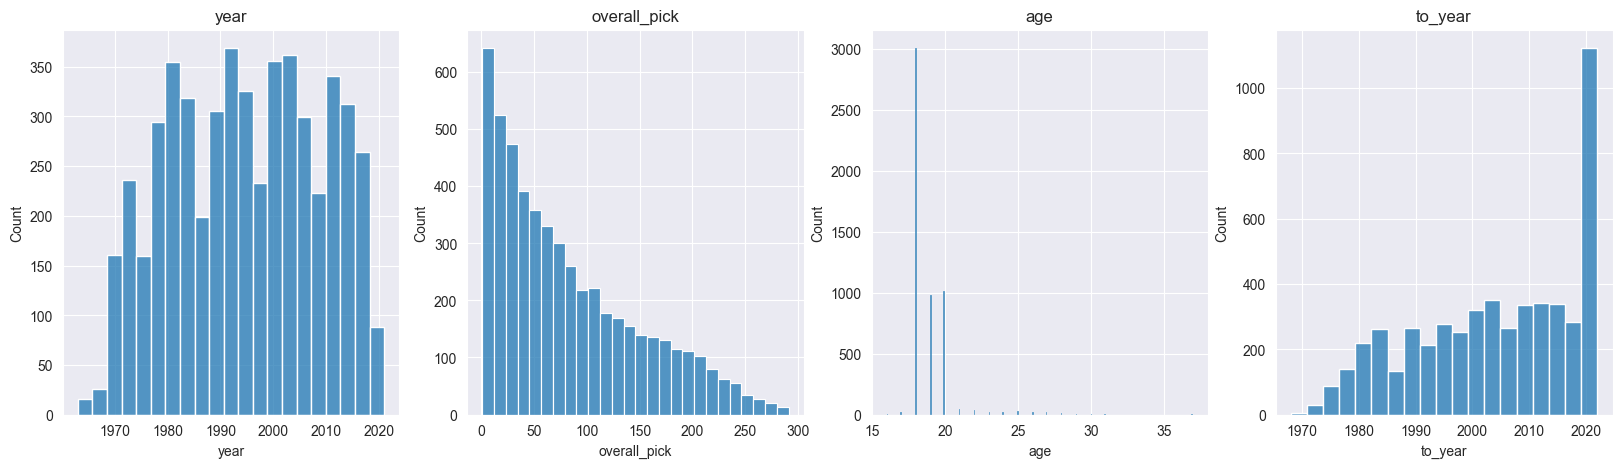

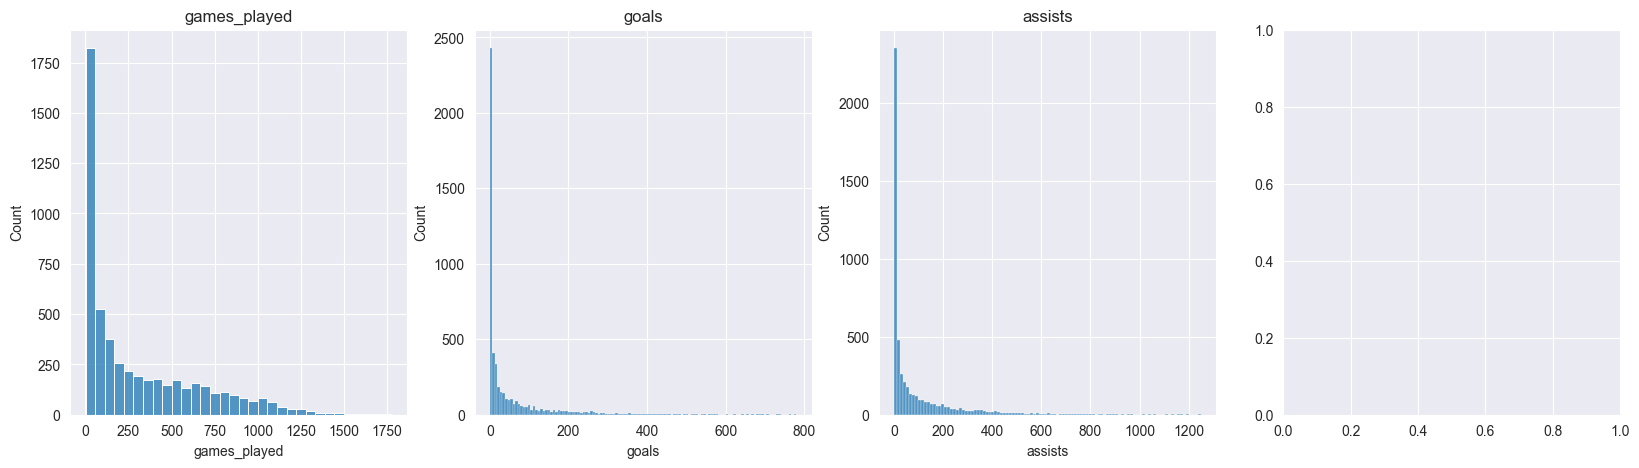

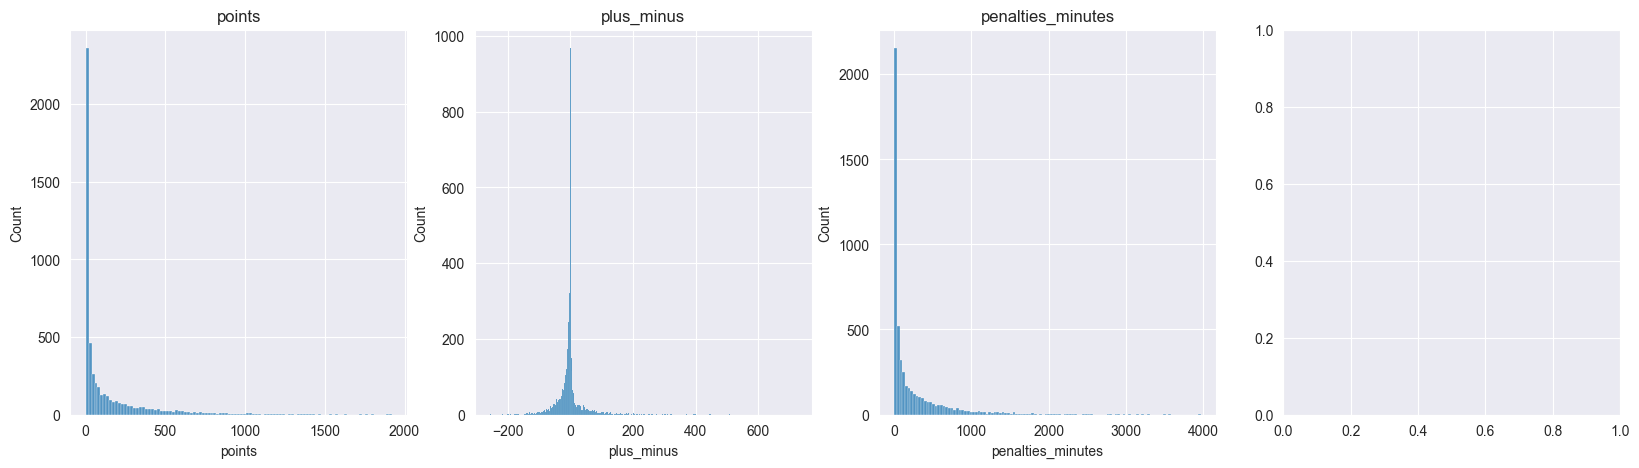

In [518]:
df_at_least_one_match = df.select_dtypes(np.number)
df_at_least_one_match = df_at_least_one_match.loc[df.games_played >=1, :]

df_at_least_one_match = df_at_least_one_match.iloc[:, 1:5]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, column in enumerate(df_at_least_one_match):
    sns.histplot(data=df_at_least_one_match, x=column, ax=axes[i]).set_title(column)
    
    
df_at_least_one_match = df.select_dtypes(np.number)
df_at_least_one_match = df_at_least_one_match.loc[df.games_played >=1, :]
df_at_least_one_match = df_at_least_one_match.iloc[:, 5:8]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, column in enumerate(df_at_least_one_match):
    sns.histplot(data=df_at_least_one_match, x=column, ax=axes[i]).set_title(column)
    
df_at_least_one_match = df.select_dtypes(np.number)
df_at_least_one_match = df_at_least_one_match.loc[df.games_played >=1, :]
df_at_least_one_match = df_at_least_one_match.iloc[:, 8:11]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, column in enumerate(df_at_least_one_match):
    sns.histplot(data=df_at_least_one_match, x=column, ax=axes[i]).set_title(column)


## Drafted players from Czech republic

In [519]:
df_drafted_czechia = df.loc[df.nationality == 'CZ', :]
df_drafted_czechia

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,...,points,plus_minus,penalties_minutes,goalie_games_played,goalie_wins,goalie_losses,goalie_ties_overtime,save_percentage,goals_against_average,point_shares
5,6,2022,6,Columbus Blue Jackets,David Jiricek,CZ,D,18.0,NaN,HC Plzen (Czech),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,28,2022,28,Buffalo Sabres,Jiri Kulich,CZ,C,18.0,NaN,HC Energie Karlovy Vary (Czech),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,48,2022,48,Vegas Golden Knights,Matyas Sapovaliv,CZ,C,18.0,NaN,Saginaw Spirit (OHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,87,2022,87,Ottawa Senators,Tomas Hamara,CZ,D,18.0,NaN,Tappara Jr. (Finland Jr.),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,93,2022,93,Florida Panthers,Marek Alscher,CZ,D,18.0,NaN,Portland Winterhawks (WHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,10104,1981,176,Edmonton Oilers,Miloslav Horava,CZ,D,20.0,1991.0,TJ Kladno (Czechoslovakia),...,22.0,10.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4
10117,10118,1981,190,Winnipeg Jets,Vladimir Kadlec,CZ,D,NaN,NaN,TJ Vitkovice (Czechoslovakia),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10145,10146,1980,7,Vancouver Canucks,Rick Lanz,CZ,D,18.0,1992.0,Oshawa Generals (OMJHL),...,286.0,-102.0,448.0,NaN,NaN,NaN,NaN,NaN,NaN,37.4
10431,10432,1979,83,Quebec Nordiques,Anton Stastny,CZ,LW,20.0,1989.0,HC Slovan Bratislava (Czechoslovakia),...,636.0,11.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0


<Axes: xlabel='overall_pick', ylabel='year'>

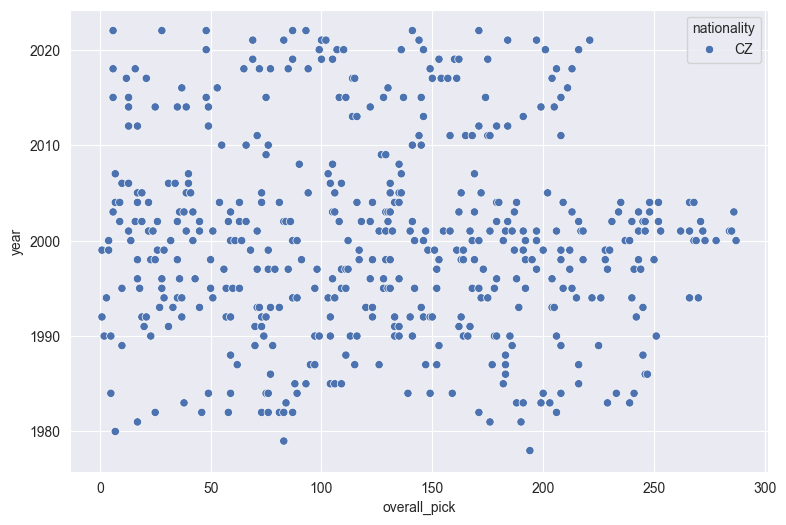

In [520]:
fig = plt.figure(figsize=((9,6)))
sns.scatterplot(data=df_drafted_czechia, x='overall_pick', y='year', hue='nationality', palette='deep')

## Line plot drafted players from Czech republic by years

<Axes: xlabel='year', ylabel='NumPlayersDrafted'>

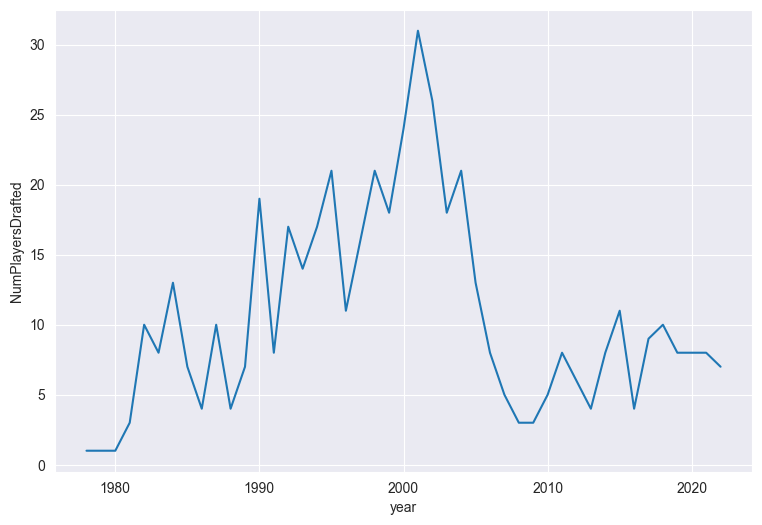

In [521]:
players_drafted_per_year = df_drafted_czechia.groupby('year').size().reset_index(name='NumPlayersDrafted')
plt.figure(figsize=(9,6))
sns.lineplot(data=players_drafted_per_year, x='year', y='NumPlayersDrafted')

## Line plot NHL drafted players per year stats since start

<Axes: xlabel='year', ylabel='NumPlayersDrafted'>

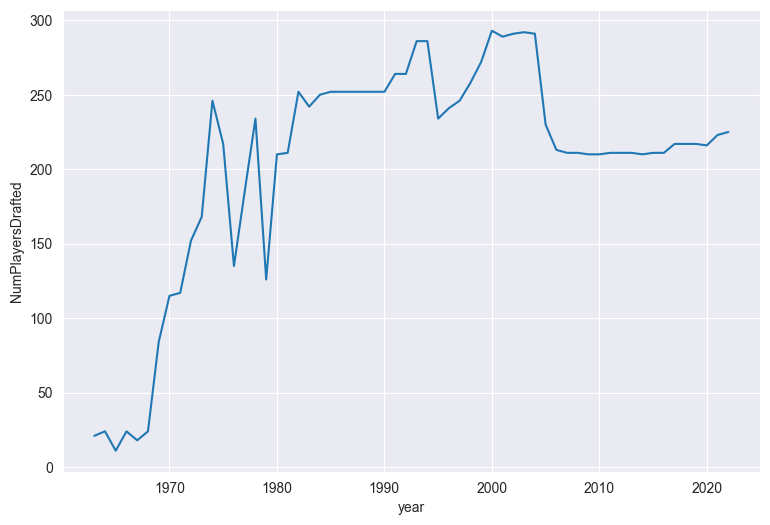

In [522]:
players_drafted_per_year = df.groupby('year').size().reset_index(name='NumPlayersDrafted')
plt.figure(figsize=(9,6))
sns.lineplot(data=players_drafted_per_year, x='year', y='NumPlayersDrafted')

## Line plot Czech NHL drafted players by age

<Axes: xlabel='age', ylabel='NumAgePlayersCzech'>

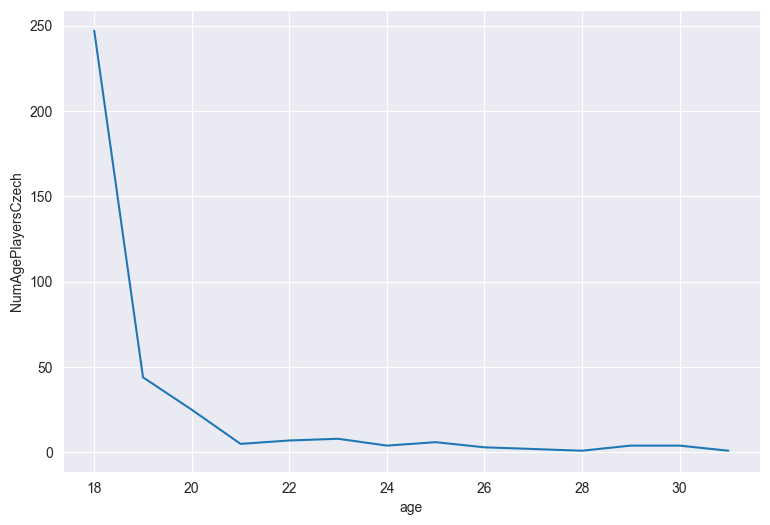

In [523]:
players_drafted_year_czechia = df.loc[df['nationality'] == 'CZ'].groupby('age').size().reset_index(name='NumAgePlayersCzech')
plt.figure(figsize=(9,6))
sns.lineplot(data=players_drafted_year_czechia, x='age', y='NumAgePlayersCzech')

## Line plot NHL drafted players by age

<Axes: xlabel='age', ylabel='NumAgePlayers'>

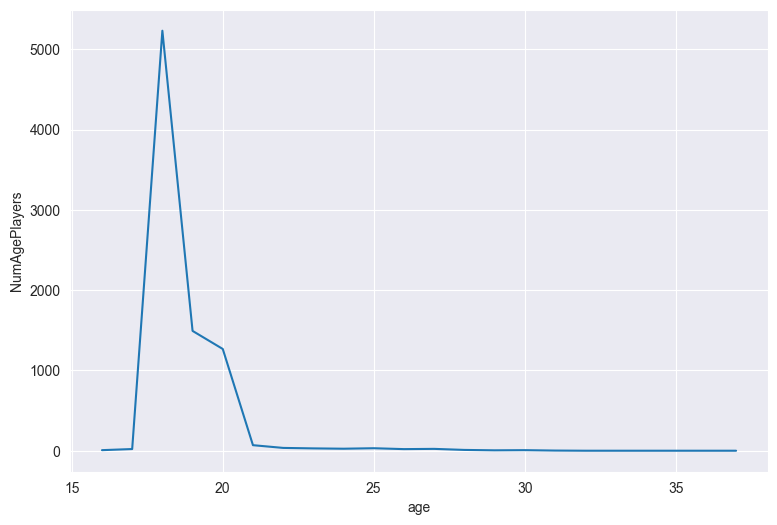

In [524]:
players_drafted_year = df.groupby('age').size().reset_index(name='NumAgePlayers')
plt.figure(figsize=(9,6))
sns.lineplot(data=players_drafted_year, x='age', y='NumAgePlayers')

## Teams which are producing the most players from Czech republic to NHL 

In [525]:
df_czech_amateur_league = df_drafted_czechia.groupby('amateur_team').size().nlargest(n=20).reset_index(name='AmateurTeamIn')

## Created new column with name amateur_league -> in this column is extracted the nema of league from which players came into NHL
df_czech_amateur_league['amateur_league'] = df_czech_amateur_league['amateur_team'].str.extract(r'\((.*?)\)')

df_czech_amateur_league[['amateur_team', 'amateur_league', 'AmateurTeamIn']]

,amateur_team,amateur_league,AmateurTeamIn
0,ASD Dukla Jihlava (Czechoslovakia),Czechoslovakia,18
1,HC Slavia Praha Jr. (Czech Jr.),Czech Jr.,17
2,HC Ceske Budejovice (Czech),Czech,14
3,HC Slavia Praha (Czech),Czech,14
4,HC Sparta Praha Jr. (Czech Jr.),Czech Jr.,11
5,HC Kladno (Czech),Czech,10
6,HC Litvinov Jr. (Czech Jr.),Czech Jr.,10
7,TJ Sparta Praha (Czechoslovakia),Czechoslovakia,10
8,TJ Litvinov (Czechoslovakia),Czechoslovakia,9
9,TJ Kladno (Czechoslovakia),Czechoslovakia,8


<Axes: xlabel='AmateurTeamIn', ylabel='amateur_team'>

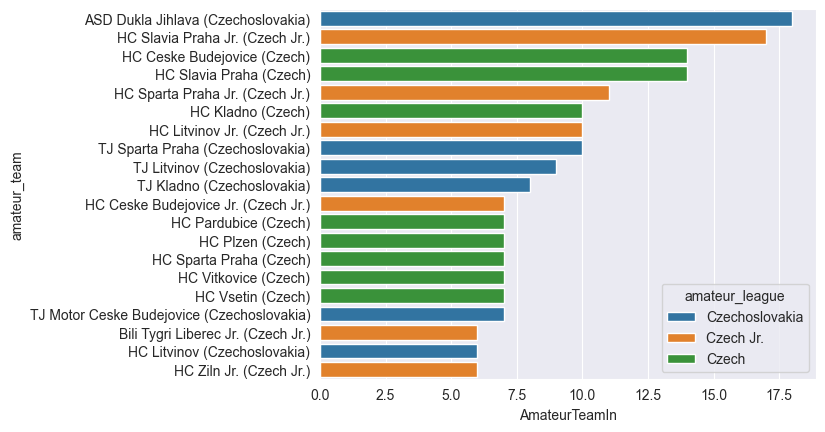

In [526]:
sns.barplot(data=df_czech_amateur_league, y='amateur_team', x='AmateurTeamIn', hue='amateur_league')

## Teams which are producing the most players in general to NHL

In [527]:
df_amateur_league = df.groupby('amateur_team').size().nlargest(n=20).reset_index(name='AmateurTeamIn')

## Created new column with name amateur_league -> in this column is extracted the nema of league from which players came into NHL
df_amateur_league['amateur_league'] = df_amateur_league['amateur_team'].str.extract(r'\((.*?)\)')

df_amateur_league[['amateur_team', 'amateur_league', 'AmateurTeamIn']]

,amateur_team,amateur_league,AmateurTeamIn
0,USA U-18 Development Team (USDP/USHL),USDP/USHL,157
1,London Knights (OHL),OHL,134
2,Oshawa Generals (OHL),OHL,128
3,Soo Greyhounds (OHL),OHL,121
4,Peterborough Petes (OHL),OHL,118
5,Kitchener Rangers (OHL),OHL,111
6,Ottawa 67's (OHL),OHL,105
7,Kamloops Blazers (WHL),WHL,104
8,Saskatoon Blades (WHL),WHL,101
9,Brandon Wheat Kings (WHL),WHL,99


<Axes: xlabel='AmateurTeamIn', ylabel='amateur_team'>

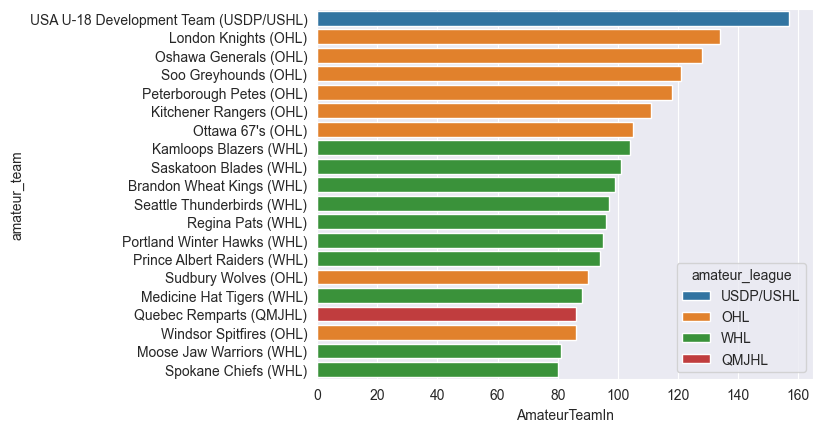

In [528]:
sns.barplot(data=df_amateur_league, y='amateur_team', x='AmateurTeamIn', hue='amateur_league')

## Pair plots for few columns

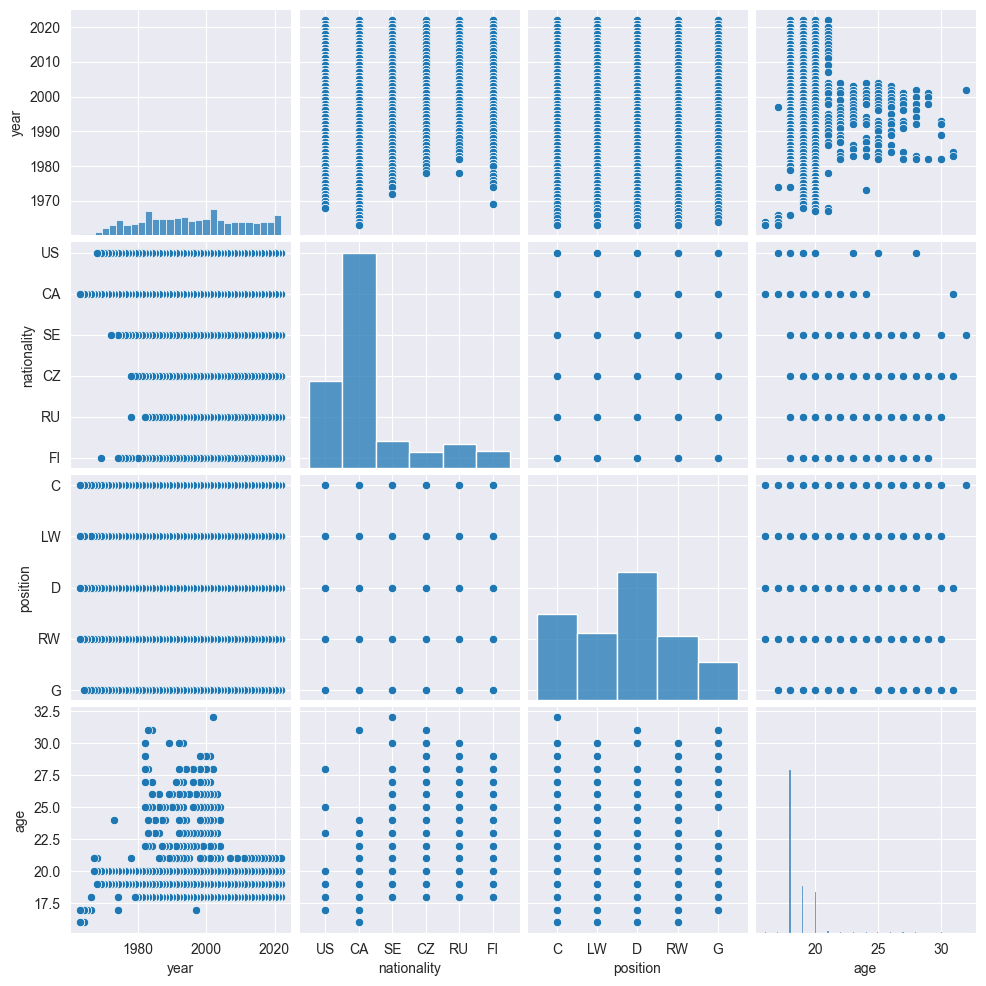

In [529]:
# Count the occurrences of each position
top_positions = df['position'].value_counts().head(5).index
# Filter the DataFrame for the top 5 positions
filtered_df_position = df[df['position'].isin(top_positions)]

# Count the occurrences of each nationality
top_nationalities = df['nationality'].value_counts().head(6).index
# Filter the DataFrame for the top 6 nationalities
filtered_df_nationality = df[df['nationality'].isin(top_nationalities)]

# Combine filters: positions and nationalities
filtered_df = df[
    df['position'].isin(top_positions) & df['nationality'].isin(top_nationalities)
]

# Create the pairplot with the selected columns
selected_columns = ['year', 'nationality', 'position','age']
sns.pairplot(data=filtered_df, vars=selected_columns)


## Subplots

/var/folders/7_/pgj1brv576n2dwkpqdzg9f1c0000gn/T/ipykernel_97957/2681627778.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
/var/folders/7_/pgj1brv576n2dwkpqdzg9f1c0000gn/T/ipykernel_97957/2681627778.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
/var/folders/7_/pgj1brv576n2dwkpqdzg9f1c0000gn/T/ipykernel_97957/2681627778.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
/var/folders/7_/pgj1brv576n2dwkpqdzg9f1c0000gn/T/ipykernel_97957/2681627778.py:11: UserWarning: set_ticklabels() should only be used with a

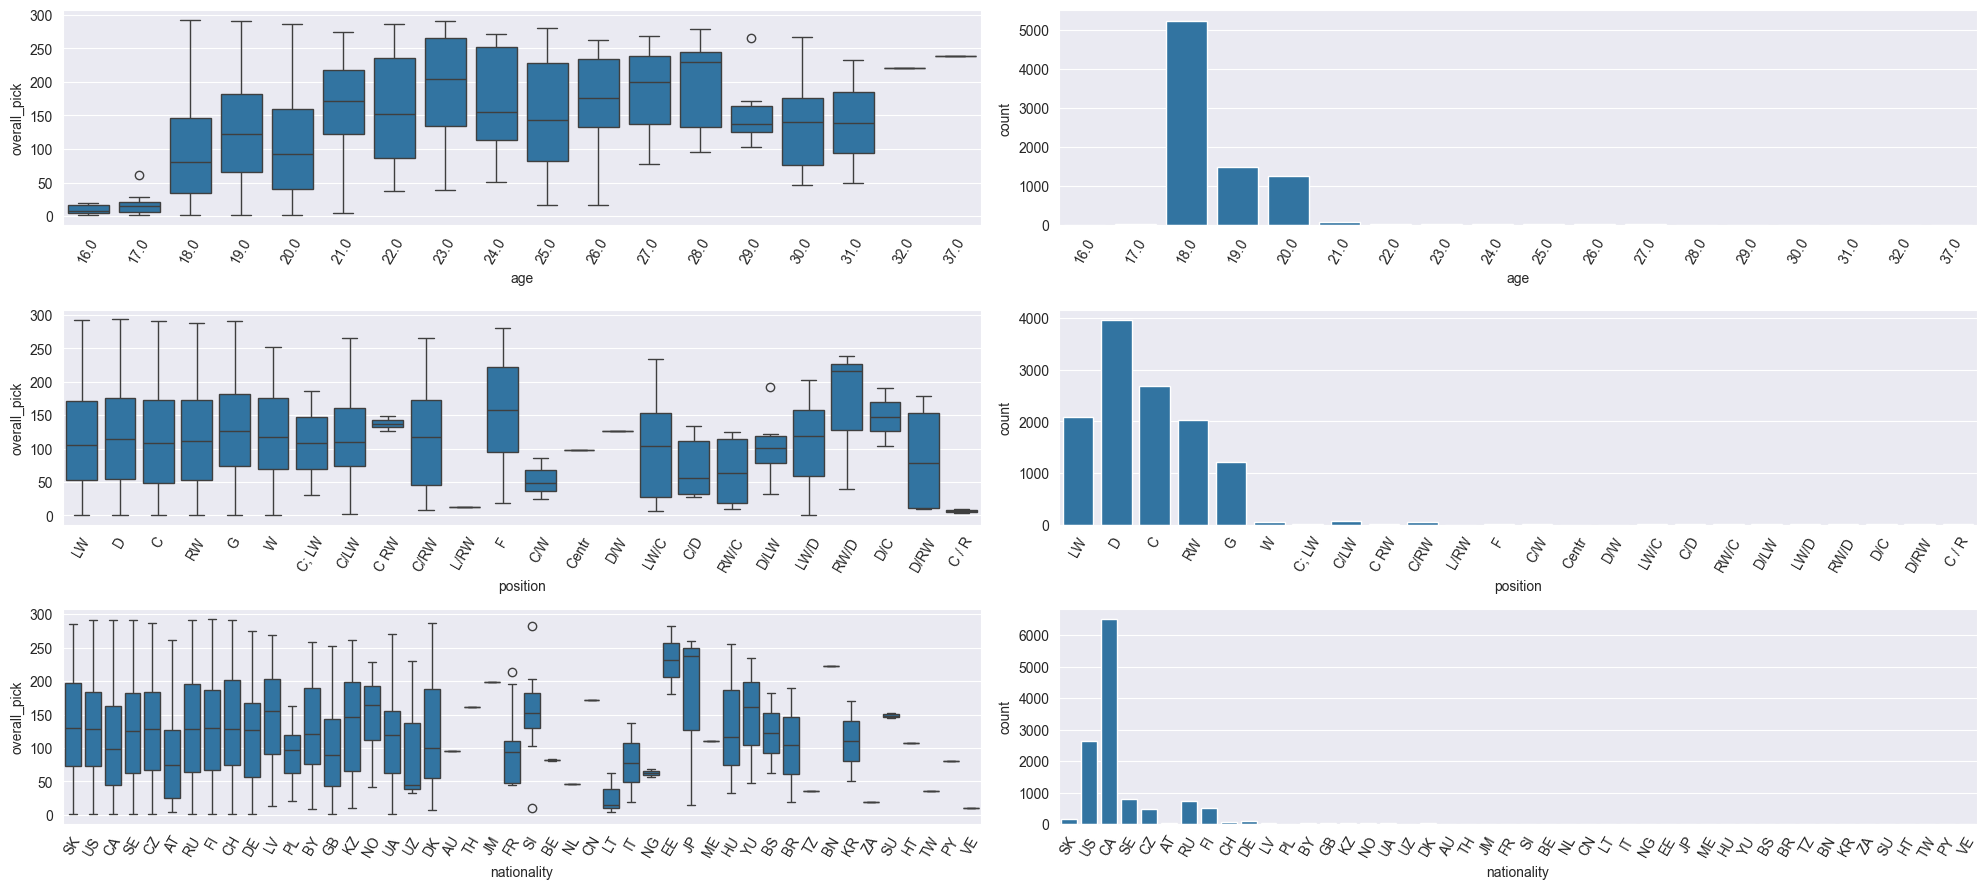

In [530]:
qualitative_columns = ['age', 'position', 'nationality']

fig, axes = plt.subplots(len(qualitative_columns), 2, figsize=(20, 9))

for i, col in enumerate(qualitative_columns):
    ax_left = fig.axes[2*i]
    ax_right = fig.axes[2*i + 1]
    sns.boxplot(data=df, x=col, y='overall_pick', ax=ax_left)
    ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
    sns.countplot(data=df, x=col, ax=ax_right)
    ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
        
fig.tight_layout()

In [531]:
# correlation matrix
# I need to create new data fram I need to drop all NAN values
# df_corr = df.dropna(axis=1, how='all')

df_corr = df.dropna(subset=['age'])  # Drop rows with NaN in 'age'
df_corr = df_corr[df_corr['year'] != 2022]  # Drop rows where 'year' == 2022

columns = ['year', 'overall_pick','games_played', 'age', 'goals', 'assists','points']
corr_matrix = df_corr[columns].corr()
corr_matrix

,year,overall_pick,games_played,age,goals,assists,points
year,1.000000,0.223454,-0.149953,-0.267437,-0.137180,-0.149508,-0.148050
overall_pick,0.223454,1.000000,-0.250662,0.185547,-0.238435,-0.246359,-0.248963
games_played,-0.149953,-0.250662,1.000000,-0.079182,0.782233,0.857632,0.847379
age,-0.267437,0.185547,-0.079182,1.000000,-0.056717,-0.055004,-0.056991
goals,-0.137180,-0.238435,0.782233,-0.056717,1.000000,0.904756,0.964553
assists,-0.149508,-0.246359,0.857632,-0.055004,0.904756,1.000000,0.985084
points,-0.148050,-0.248963,0.847379,-0.056991,0.964553,0.985084,1.000000


<Axes: >

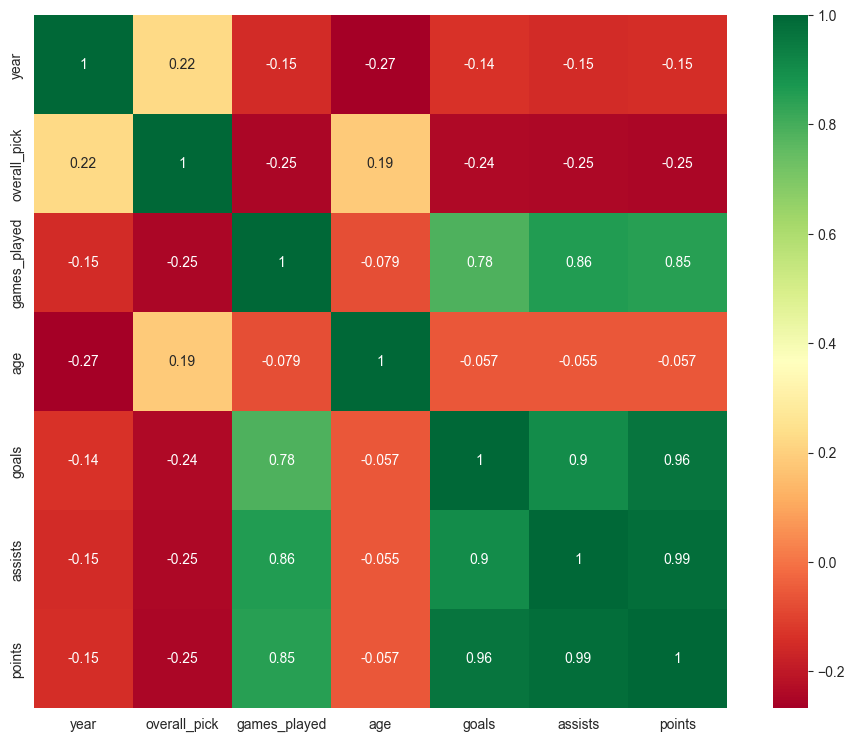

In [532]:
# visualize via heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, square=True, cmap='RdYlGn', annot=True)

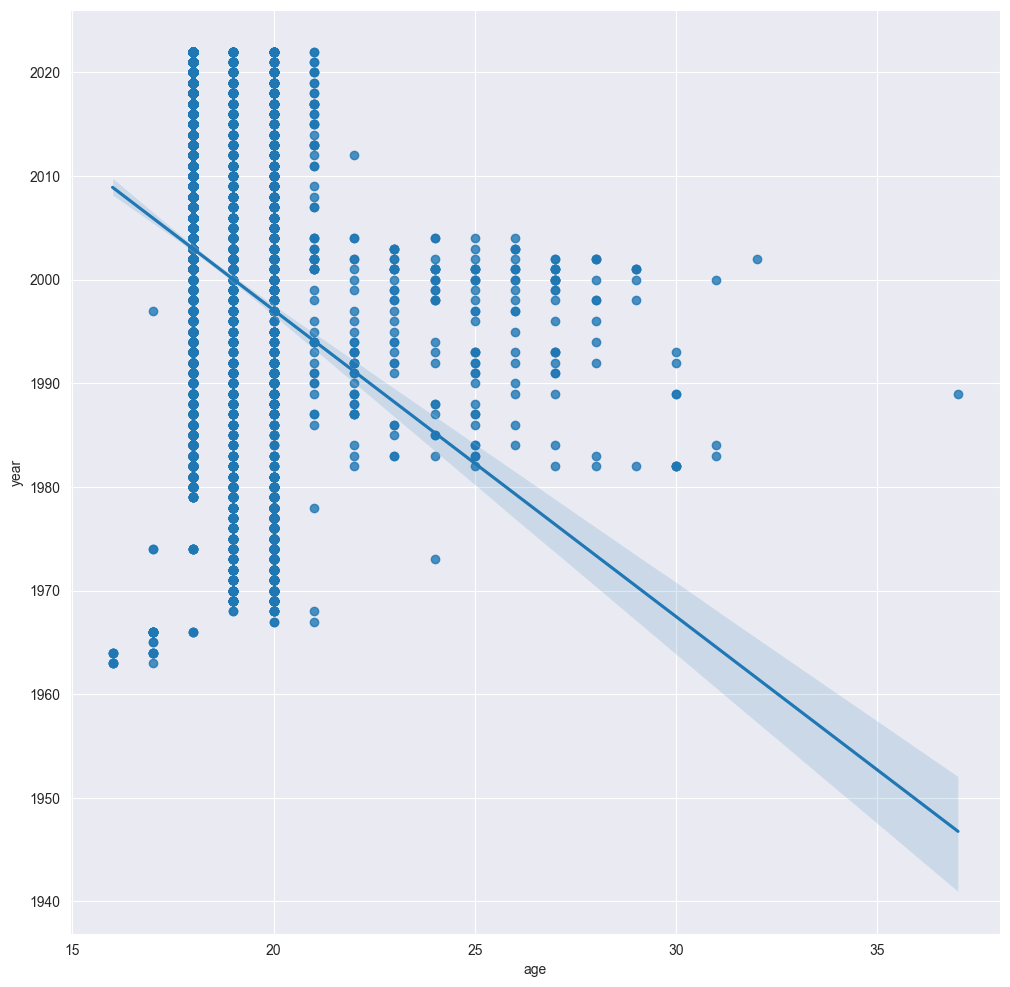

In [533]:
# regression plot
# scatter plot with regression line fron the example gallery
fig = plt.figure(figsize=(12, 12))
sns.regplot(data = df, x='age', y='year')
plt.show()

In [534]:
df

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,...,points,plus_minus,penalties_minutes,goalie_games_played,goalie_wins,goalie_losses,goalie_ties_overtime,save_percentage,goals_against_average,point_shares
0,1,2022,1,Montreal Canadiens,Juraj Slafkovsky,SK,LW,18.0,NaN,TPS (Finland),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2022,2,New Jersey Devils,Simon Nemec,SK,D,18.0,NaN,HK Nitra (Slovakia),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2022,3,Arizona Coyotes,Logan Cooley,US,C,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022,4,Seattle Kraken,Shane Wright,CA,C,18.0,NaN,Kingston Frontenacs (OHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2022,5,Philadelphia Flyers,Cutter Gauthier,SE,LW,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,12246,1963,17,Toronto Maple Leafs,Jim McKenny,CA,D,16.0,1979.0,Toronto Neil McNeil Maroons (MetJAHL),...,329.0,-4.0,294.0,NaN,NaN,NaN,NaN,NaN,NaN,53.7
12246,12247,1963,18,Montreal Canadiens,Glen Shirton,CA,D,NaN,NaN,Port Colborne Midgets (),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12247,12248,1963,19,Boston Bruins,Jim Blair,CA,F,NaN,NaN,Georgetown Midgets (OHA-Jr.),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12248,12249,1963,20,New York Rangers,Campbell Alleson,CA,D,NaN,NaN,Portage la Prairie Jr. (),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# K means clustering - algorithm
## I need to drop all players which are drafted at year 2022 (they dont have any statistics)

In [535]:
df.isna().sum().sort_values(ascending=False).head(20)

save_percentage          11762
goalie_ties_overtime     11762
goalie_losses            11762
goalie_wins              11762
goals_against_average    11760
goalie_games_played      11760
plus_minus                7016
goals                     7004
assists                   7004
penalties_minutes         7004
points                    7004
point_shares              7004
games_played              7004
to_year                   7004
age                       3959
position                    27
nationality                  4
team                         1
year                         0
amateur_team                 0
dtype: int64

## I will prepare data
- I will chose sample of 1000 players for faster analysis
- I will use OrdinalEncoder for encoding categorical data like nationality, position and team
- I will delete features like, name, id, points_shared, goals_against_average etc.. it is not necessary for us
- I will also delete rows which has NAN age columns and data with year = 2022 

In [536]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Select a sample of 1,000 players from the DataFrame
df_clustering = df.copy().sample(1000, random_state=1)  

# Step 2: Encode categorical columns
encoder = OrdinalEncoder()
df_clustering["nationality"] = encoder.fit_transform(df_clustering[["nationality"]])
df_clustering["position"] = encoder.fit_transform(df_clustering[["position"]])
df_clustering["team"] = encoder.fit_transform(df_clustering[["team"]])

df_clustering = df_clustering.dropna(subset=['age'])  # Drop rows with NaN in 'age'
df_clustering = df_clustering[df_clustering['year'] != 2022]  # Drop rows where 'year' == 2022

# Step 4: Fill remaining NaN values with 0
df_clustering.fillna(0, inplace=True)

# Step 5: Drop unnecessary columns
columns_to_drop = [
    "id", "player", "point_shares", "goals_against_average", 
    "goalie_ties_overtime", "goalie_losses", "goalie_wins"
]
df_clustering = df_clustering.drop(columns=columns_to_drop, errors='ignore')  # Ignore errors if columns are missing

# Step 6: Select only numerical columns
df_clustering = df_clustering.select_dtypes(include='number')

df_clustering

,year,overall_pick,team,nationality,position,age,to_year,games_played,goals,assists,points,plus_minus,penalties_minutes,goalie_games_played,save_percentage
3660,2005,26,6.0,2.0,11.0,18.0,2014.0,13.0,1.0,3.0,4.0,2.0,38.0,0.0,0.0
345,2021,122,1.0,7.0,7.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4220,2003,65,5.0,14.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11949,1970,21,31.0,2.0,8.0,20.0,1975.0,258.0,58.0,60.0,118.0,-64.0,158.0,0.0,0.0
5229,2000,202,26.0,2.0,4.0,19.0,2008.0,4.0,0.0,0.0,0.0,-2.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,1998,107,40.0,17.0,11.0,19.0,2002.0,8.0,0.0,1.0,1.0,-4.0,6.0,0.0,0.0
629,2020,183,26.0,7.0,4.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2416,2011,48,15.0,8.0,4.0,18.0,2021.0,178.0,5.0,23.0,28.0,-3.0,82.0,0.0,0.0
10653,1978,179,9.0,2.0,8.0,20.0,1987.0,406.0,161.0,118.0,279.0,-11.0,286.0,0.0,0.0


## Now we can see we have all data fill in

In [537]:
df_clustering.isna().sum().sort_values(ascending=False).head(20)

year                   0
overall_pick           0
team                   0
nationality            0
position               0
age                    0
to_year                0
games_played           0
goals                  0
assists                0
points                 0
plus_minus             0
penalties_minutes      0
goalie_games_played    0
save_percentage        0
dtype: int64

## I need to calculate for optimal number of clusters
### I am using elbow method and silhouette

In [538]:
clustering_scores = []
for k in range(2, 12):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=1, n_init=10).fit(df_clustering)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(df_clustering, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

df_clustering_scores

,sse,silhouette
k,,
2,1.618838e+08,0.787762
3,7.468835e+07,0.724771
4,5.283228e+07,0.682822
5,4.047868e+07,0.675521
6,3.441649e+07,0.672924
7,2.927715e+07,0.685326
8,2.552723e+07,0.657014
9,2.214384e+07,0.646063
10,1.960619e+07,0.661017


## We can see elbow method 
### I will decide to take 3 clusters

<Axes: xlabel='k', ylabel='sse'>

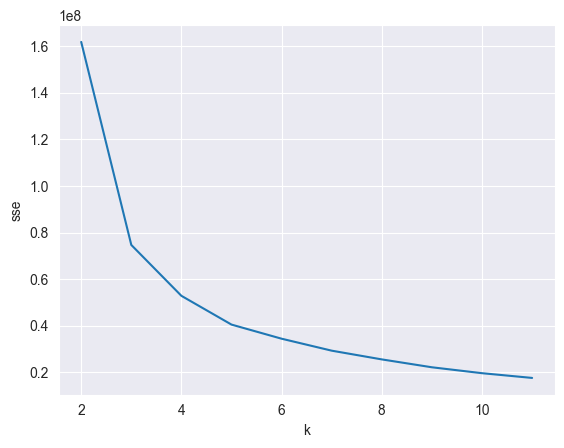

In [539]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

## Here is silhouette

<Axes: xlabel='k', ylabel='silhouette'>

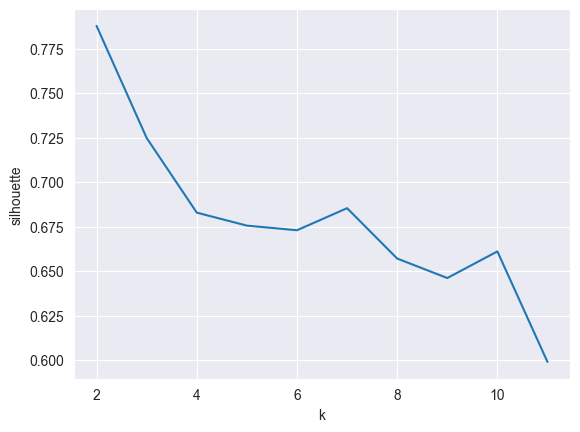

In [540]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

## Apply Kmeans algorithm

In [541]:
kmeans_clus = df_clustering.copy()

X = df_clustering.values
clustering = sklearn.cluster.KMeans(n_clusters=3, random_state=1, n_init=10).fit(X)

kmeans_clus["cluster_id"] = clustering.labels_

kmeans_clus


,year,overall_pick,team,nationality,position,age,to_year,games_played,goals,assists,points,plus_minus,penalties_minutes,goalie_games_played,save_percentage,cluster_id
3660,2005,26,6.0,2.0,11.0,18.0,2014.0,13.0,1.0,3.0,4.0,2.0,38.0,0.0,0.0,0
345,2021,122,1.0,7.0,7.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4220,2003,65,5.0,14.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11949,1970,21,31.0,2.0,8.0,20.0,1975.0,258.0,58.0,60.0,118.0,-64.0,158.0,0.0,0.0,0
5229,2000,202,26.0,2.0,4.0,19.0,2008.0,4.0,0.0,0.0,0.0,-2.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,1998,107,40.0,17.0,11.0,19.0,2002.0,8.0,0.0,1.0,1.0,-4.0,6.0,0.0,0.0,0
629,2020,183,26.0,7.0,4.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2416,2011,48,15.0,8.0,4.0,18.0,2021.0,178.0,5.0,23.0,28.0,-3.0,82.0,0.0,0.0,0
10653,1978,179,9.0,2.0,8.0,20.0,1987.0,406.0,161.0,118.0,279.0,-11.0,286.0,0.0,0.0,0


In [542]:
kmeans_clus["cluster_id"].value_counts()

cluster_id
0    327
1    221
2    100
Name: count, dtype: int64

<Axes: xlabel='cluster_id', ylabel='count'>

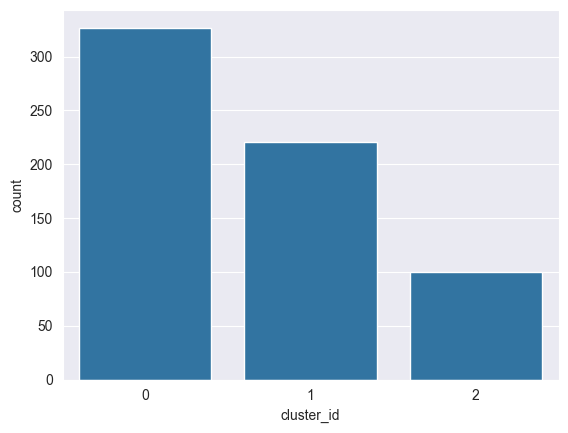

In [543]:
sns.countplot(data=kmeans_clus, x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='age'>

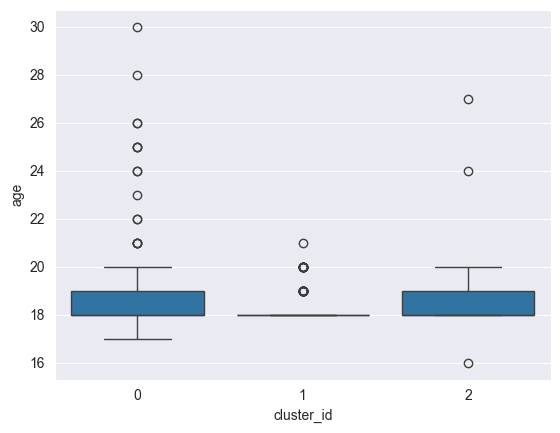

In [544]:
sns.boxplot(data=kmeans_clus, y="age",x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='year'>

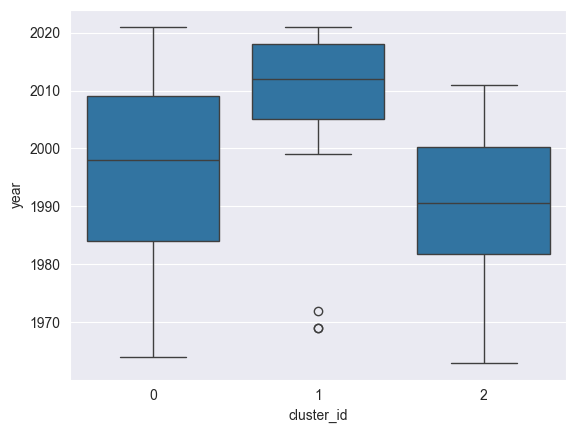

In [545]:
sns.boxplot(data=kmeans_clus, y="year",x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='points'>

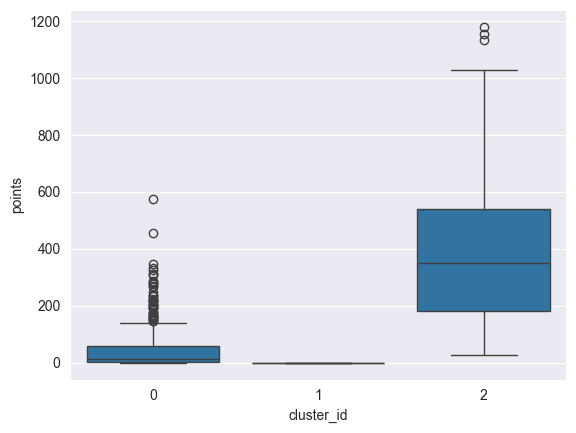

In [546]:
sns.boxplot(data=kmeans_clus, y="points",x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='overall_pick'>

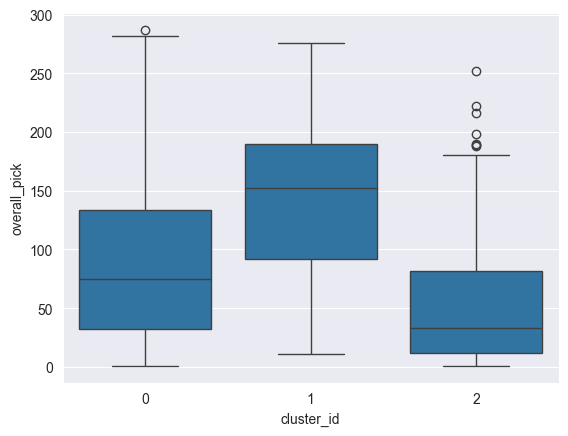

In [547]:
sns.boxplot(data=kmeans_clus, y="overall_pick",x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='games_played'>

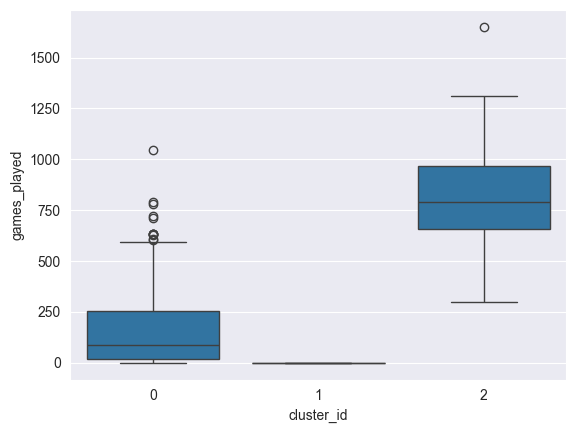

In [548]:
sns.boxplot(data=kmeans_clus, y="games_played",x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='goalie_games_played'>

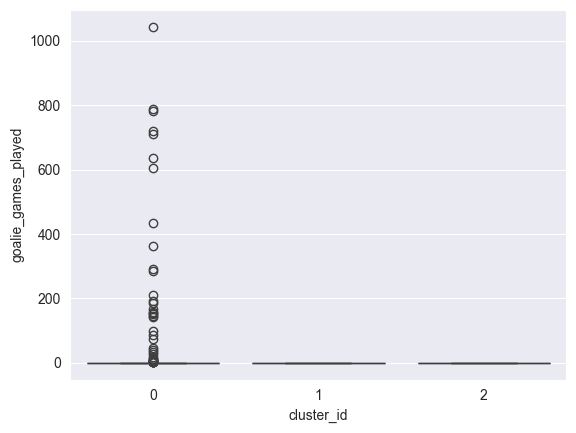

In [549]:
sns.boxplot(data=kmeans_clus, y="goalie_games_played",x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='save_percentage'>

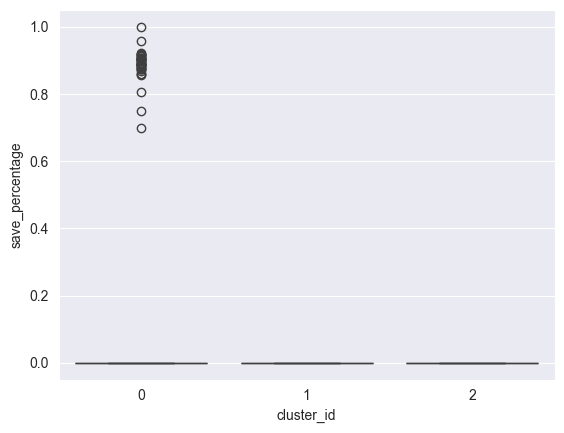

In [550]:
sns.boxplot(data=kmeans_clus, y="save_percentage",x="cluster_id")

## Logicaly we can devide data into these 3 clusters
- 0 - normal players + goalies
- 1 - bad players
- 2 - good players

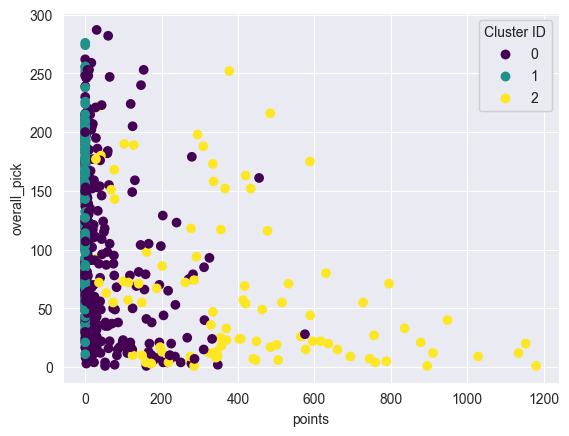

In [551]:
scatter = plt.scatter(kmeans_clus["points"], kmeans_clus["overall_pick"], c=kmeans_clus["cluster_id"], cmap="viridis")
plt.xlabel("points")
plt.ylabel("overall_pick")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

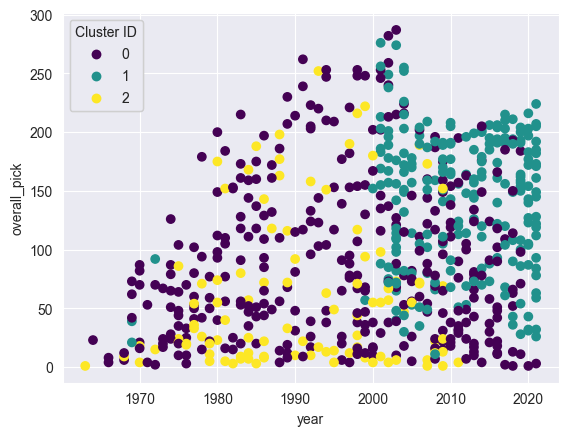

In [552]:
scatter = plt.scatter(kmeans_clus["year"], kmeans_clus["overall_pick"], c=kmeans_clus["cluster_id"], cmap="viridis")
plt.xlabel("year")
plt.ylabel("overall_pick")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

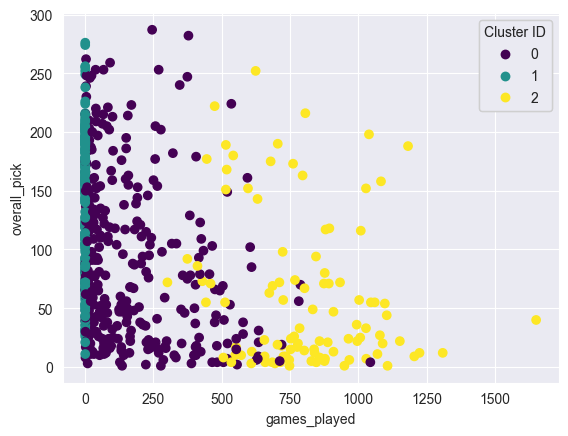

In [553]:
scatter = plt.scatter(kmeans_clus["games_played"], kmeans_clus["overall_pick"], c=kmeans_clus["cluster_id"], cmap="viridis")
plt.xlabel("games_played")
plt.ylabel("overall_pick")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

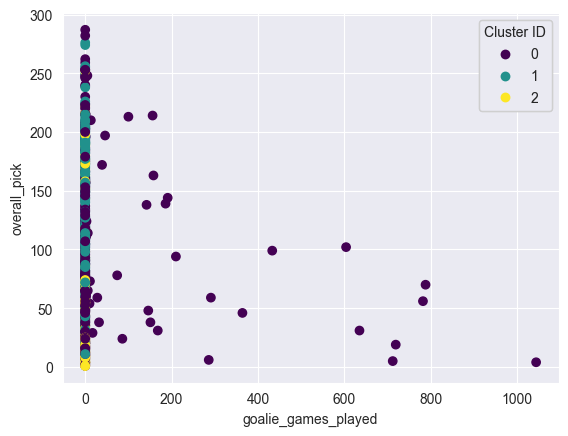

In [554]:
scatter = plt.scatter(kmeans_clus["goalie_games_played"], kmeans_clus["overall_pick"], c=kmeans_clus["cluster_id"], cmap="viridis")
plt.xlabel("goalie_games_played")
plt.ylabel("overall_pick")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

# K mean second example with scaled data without goalies (only for players)

In [555]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# Step 1: Select a sample of 1,000 players from the DataFrame
df_clustering_players = df.copy().sample(1000, random_state=1)  

df_clustering_players = df_clustering_players.dropna(subset=['age'])  # Drop rows with NaN in 'age'
df_clustering_players = df_clustering_players[df_clustering_players['year'] != 2022]  # Drop rows where 'year' == 2022

# Step 4: Fill remaining NaN values with 0
df_clustering_players.fillna(0, inplace=True)

# Step 5: Drop unnecessary columns
columns_to_drop = [
    "id", "player", "point_shares", "goals_against_average", 
    "goalie_ties_overtime", "goalie_losses", "goalie_wins", "plus_minus", "goalie_games_played","save_percentage"
]
df_clustering_players = df_clustering_players.drop(columns=columns_to_drop, errors='ignore')  # Ignore errors if columns are missing

# # Step 6: Select only numerical columns
# df_clustering_players = df_clustering_players.select_dtypes(include='number')

df_enc = pd.DataFrame(index = df_clustering_players.index)

# Step 2: Encode categorical columns
# encoder = OrdinalEncoder()
df_enc["nationality"] = encoder.fit_transform(df_clustering_players[["nationality"]])
df_enc["position"] = encoder.fit_transform(df_clustering_players[["position"]])
df_enc["team"] = encoder.fit_transform(df_clustering_players[["team"]])

df_enc['year'] = sklearn.preprocessing.minmax_scale(df_clustering_players[['year']])
df_enc['overall_pick'] = sklearn.preprocessing.minmax_scale(df_clustering_players[['overall_pick']])
df_enc['age'] = sklearn.preprocessing.minmax_scale(df_clustering_players[['age']])
df_enc['to_year'] = sklearn.preprocessing.minmax_scale(df_clustering_players[['to_year']])

# Initialize PowerTransformer with Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# Apply PowerTransformer to the skewed features
columns_to_transform = ['games_played', 'points', 'assists', 'goals', 'penalties_minutes']
df_enc[columns_to_transform] = pt.fit_transform(df_clustering_players[columns_to_transform])

df_enc = df_enc.select_dtypes(include='number')
df_enc

,nationality,position,team,year,overall_pick,age,to_year,games_played,points,assists,goals,penalties_minutes
3660,2.0,10.0,6.0,0.724138,0.087413,0.142857,0.996044,-0.177599,-0.079995,-0.087698,-0.288032,0.475612
345,7.0,6.0,1.0,1.000000,0.423077,0.142857,0.000000,-1.163028,-1.025452,-1.011296,-0.912044,-1.069923
4220,13.0,7.0,5.0,0.689655,0.223776,0.142857,0.000000,-1.163028,-1.025452,-1.011296,-0.912044,-1.069923
11949,2.0,7.0,31.0,0.120690,0.069930,0.285714,0.976756,0.904315,1.140516,1.084366,1.301097,0.943969
5229,2.0,4.0,26.0,0.637931,0.702797,0.214286,0.993076,-0.561283,-1.025452,-1.011296,-0.912044,-0.326903
...,...,...,...,...,...,...,...,...,...,...,...,...
5699,16.0,10.0,39.0,0.603448,0.370629,0.214286,0.990109,-0.342125,-0.584330,-0.514657,-0.912044,-0.184912
629,7.0,4.0,26.0,0.982759,0.636364,0.142857,0.000000,-1.163028,-1.025452,-1.011296,-0.912044,-1.069923
2416,8.0,4.0,15.0,0.827586,0.164336,0.142857,0.999505,0.767764,0.681896,0.758553,0.440167,0.734790
10653,2.0,7.0,9.0,0.258621,0.622378,0.285714,0.982690,1.071203,1.366514,1.280213,1.511853,1.123522


## I need calculate number of clusters

In [556]:
clustering_scores_players = []
for k in range(2, 12):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=1, n_init=10).fit(df_enc)
    clustering_scores_players.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(df_enc, clustering.labels_)
    })
df_clustering_scores_players = pd.DataFrame.from_dict(clustering_scores_players, orient='columns')
df_clustering_scores_players = df_clustering_scores_players.set_index('k')

df_clustering_scores_players

,sse,silhouette
k,,
2,52528.695125,0.449933
3,41102.448593,0.381172
4,32589.206511,0.331373
5,26085.617261,0.350697
6,22416.076467,0.329377
7,19025.738519,0.342090
8,16728.909001,0.348873
9,15564.399429,0.335697
10,14587.415274,0.319668


# Elbow method

<Axes: xlabel='k', ylabel='sse'>

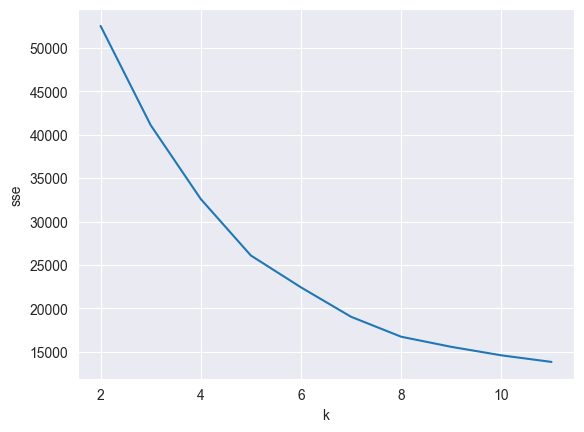

In [557]:
sns.lineplot(data = df_clustering_scores_players, y='sse', x='k')

# Apply K means with 5 clusters

In [601]:
kmeans_clus_players = df_enc.copy()

X = df_enc.values
clustering = sklearn.cluster.KMeans(n_clusters=5, random_state=5, n_init=10).fit(X)

kmeans_clus_players["cluster_id_player"] = clustering.labels_

kmeans_clus_players

,nationality,position,team,year,overall_pick,age,to_year,games_played,points,assists,goals,penalties_minutes,cluster_id_player
3660,2.0,10.0,6.0,0.724138,0.087413,0.142857,0.996044,-0.177599,-0.079995,-0.087698,-0.288032,0.475612,2
345,7.0,6.0,1.0,1.000000,0.423077,0.142857,0.000000,-1.163028,-1.025452,-1.011296,-0.912044,-1.069923,2
4220,13.0,7.0,5.0,0.689655,0.223776,0.142857,0.000000,-1.163028,-1.025452,-1.011296,-0.912044,-1.069923,4
11949,2.0,7.0,31.0,0.120690,0.069930,0.285714,0.976756,0.904315,1.140516,1.084366,1.301097,0.943969,0
5229,2.0,4.0,26.0,0.637931,0.702797,0.214286,0.993076,-0.561283,-1.025452,-1.011296,-0.912044,-0.326903,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,16.0,10.0,39.0,0.603448,0.370629,0.214286,0.990109,-0.342125,-0.584330,-0.514657,-0.912044,-0.184912,3
629,7.0,4.0,26.0,0.982759,0.636364,0.142857,0.000000,-1.163028,-1.025452,-1.011296,-0.912044,-1.069923,1
2416,8.0,4.0,15.0,0.827586,0.164336,0.142857,0.999505,0.767764,0.681896,0.758553,0.440167,0.734790,4
10653,2.0,7.0,9.0,0.258621,0.622378,0.285714,0.982690,1.071203,1.366514,1.280213,1.511853,1.123522,2


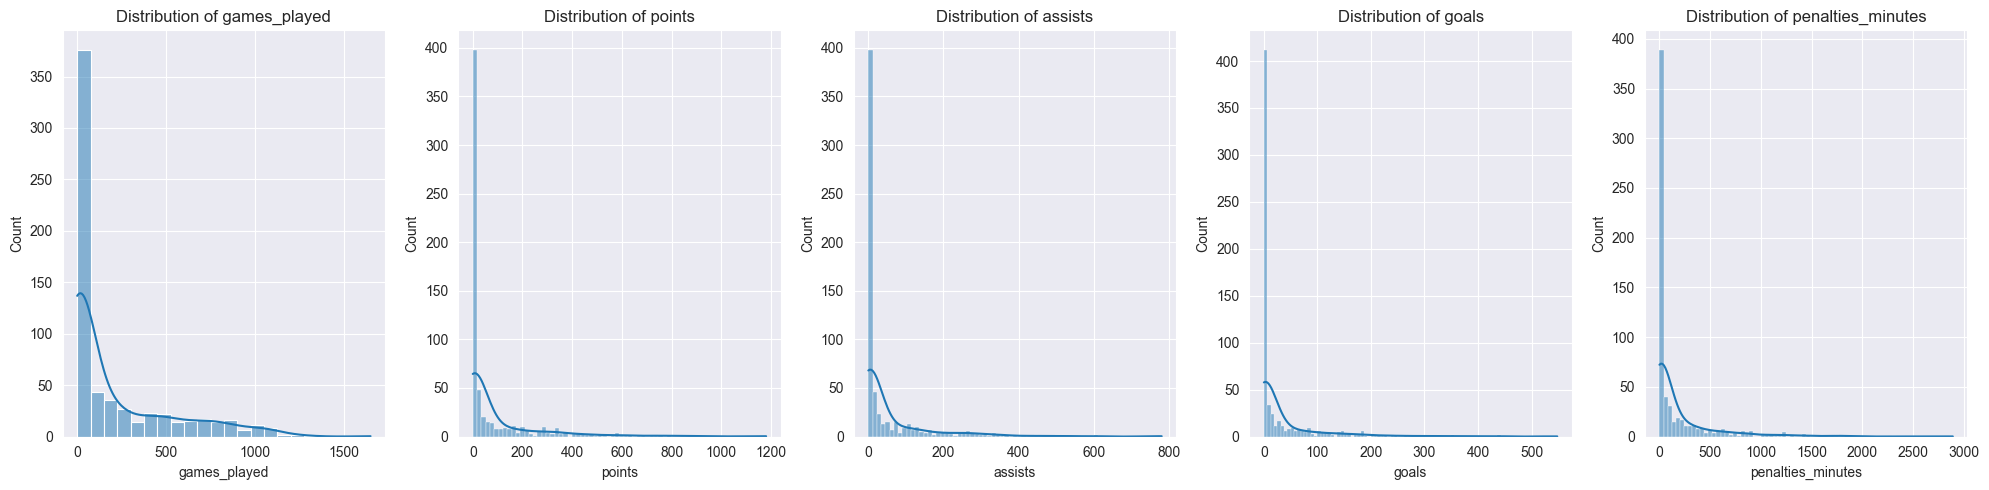

In [559]:
# Define the list of columns to plot
columns = ['games_played', 'points', 'assists', 'goals', 'penalties_minutes']

# Create a single row of subplots
fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))  # 1 row, len(columns) columns

# Loop through each column and create a histogram on the respective subplot
for col, ax in zip(columns, axes):
    sns.histplot(df_clustering_players[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

# 5 clusters looks like OK

<Axes: xlabel='cluster_id_player', ylabel='count'>

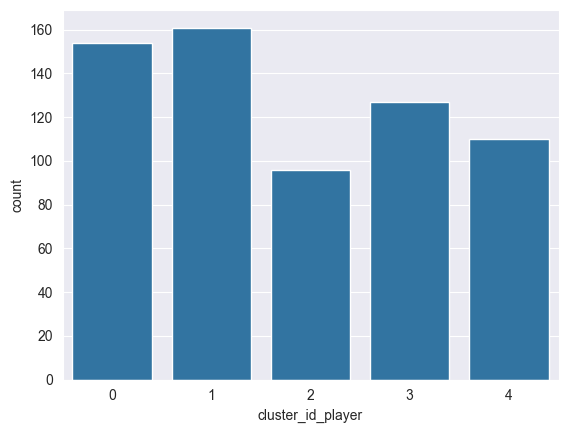

In [602]:
sns.countplot(data=kmeans_clus_players, x='cluster_id_player')

<Axes: xlabel='cluster_id_player', ylabel='goals'>

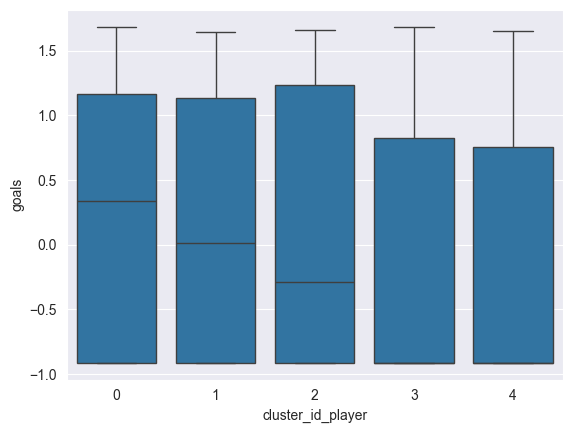

In [606]:
sns.boxplot(data=kmeans_clus_players, y="goals",x="cluster_id_player")

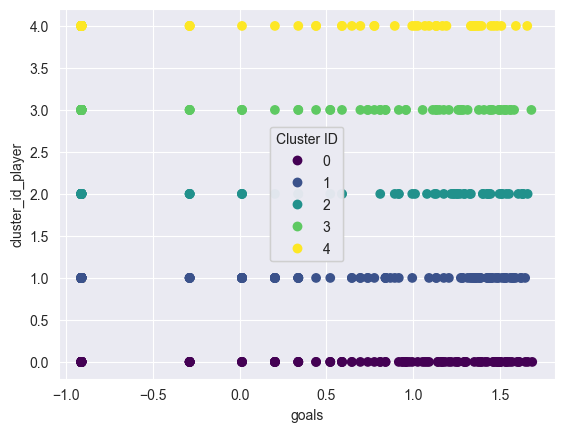

In [607]:
scatter = plt.scatter(kmeans_clus_players["goals"], kmeans_clus_players["cluster_id_player"], c=kmeans_clus_players["cluster_id_player"], cmap="viridis")
plt.xlabel("goals")
plt.ylabel("cluster_id_player")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

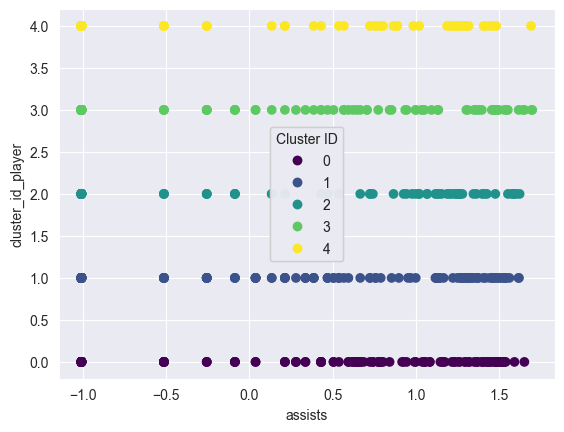

In [608]:
scatter = plt.scatter(kmeans_clus_players["assists"], kmeans_clus_players["cluster_id_player"], c=kmeans_clus_players["cluster_id_player"], cmap="viridis")
plt.xlabel("assists")
plt.ylabel("cluster_id_player")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

# MeanShift

In [563]:
from sklearn.cluster import MeanShift

# Copy the dataframe for clustering
mean_shift_clus = df_clustering.copy()

# Convert the dataframe to numpy array
X = df_clustering.values

# Perform Mean Shift clustering
clustering = MeanShift().fit(X)

# Add the cluster labels to the dataframe
mean_shift_clus["cluster_id"] = clustering.labels_

mean_shift_clus



,year,overall_pick,team,nationality,position,age,to_year,games_played,goals,assists,points,plus_minus,penalties_minutes,goalie_games_played,save_percentage,cluster_id
3660,2005,26,6.0,2.0,11.0,18.0,2014.0,13.0,1.0,3.0,4.0,2.0,38.0,0.0,0.0,0
345,2021,122,1.0,7.0,7.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4220,2003,65,5.0,14.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11949,1970,21,31.0,2.0,8.0,20.0,1975.0,258.0,58.0,60.0,118.0,-64.0,158.0,0.0,0.0,0
5229,2000,202,26.0,2.0,4.0,19.0,2008.0,4.0,0.0,0.0,0.0,-2.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,1998,107,40.0,17.0,11.0,19.0,2002.0,8.0,0.0,1.0,1.0,-4.0,6.0,0.0,0.0,0
629,2020,183,26.0,7.0,4.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2416,2011,48,15.0,8.0,4.0,18.0,2021.0,178.0,5.0,23.0,28.0,-3.0,82.0,0.0,0.0,0
10653,1978,179,9.0,2.0,8.0,20.0,1987.0,406.0,161.0,118.0,279.0,-11.0,286.0,0.0,0.0,0


In [564]:
mean_shift_clus["cluster_id"].value_counts()

cluster_id
0     301
1     221
2      69
5      18
6      14
3      10
4       9
8       1
9       1
12      1
10      1
11      1
7       1
Name: count, dtype: int64

<Axes: xlabel='cluster_id', ylabel='count'>

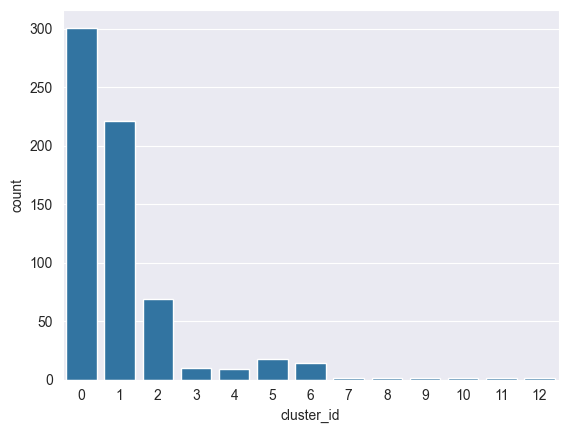

In [565]:
sns.countplot(data=mean_shift_clus, x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='age'>

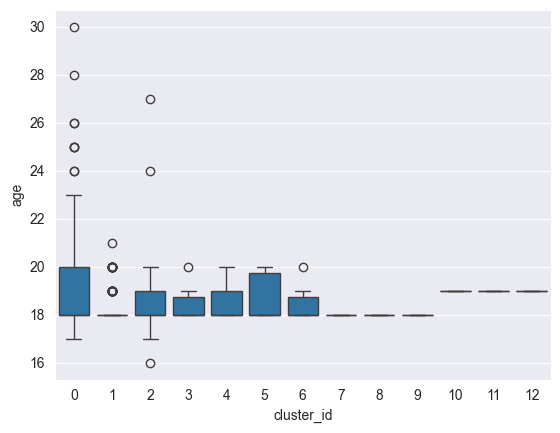

In [566]:
sns.boxplot(data=mean_shift_clus, y="age",x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='overall_pick'>

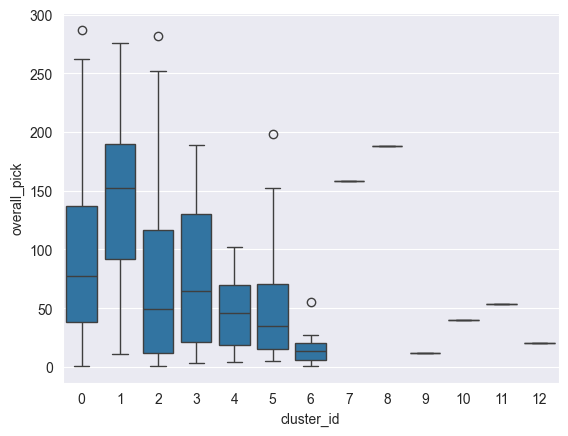

In [567]:
sns.boxplot(data=mean_shift_clus, y="overall_pick",x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='points'>

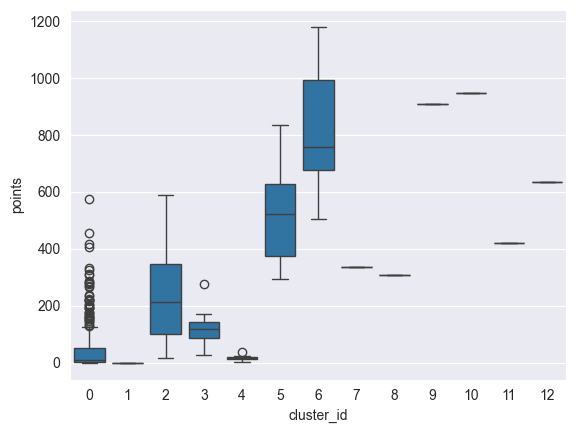

In [568]:
sns.boxplot(data=mean_shift_clus, y="points",x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='games_played'>

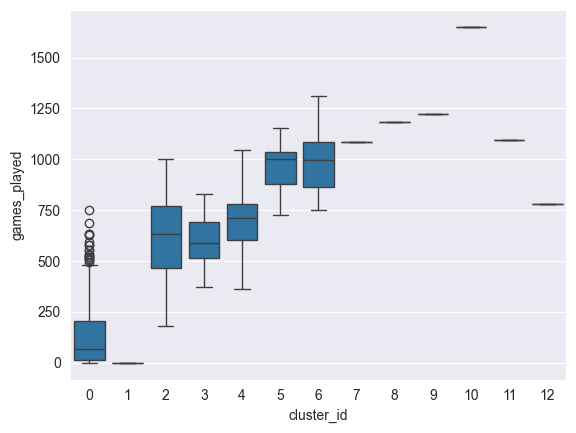

In [569]:
sns.boxplot(data=mean_shift_clus, y="games_played",x="cluster_id")

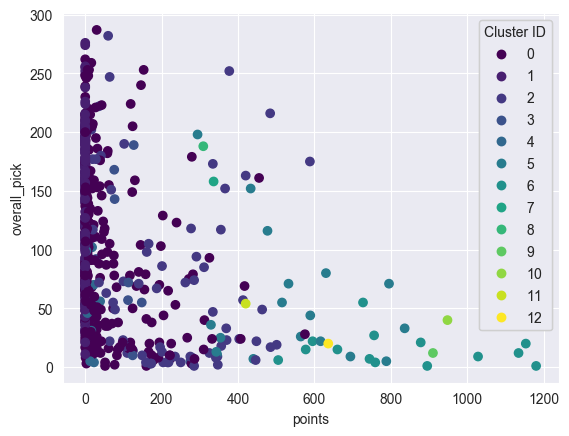

In [570]:
scatter = plt.scatter(mean_shift_clus["points"], mean_shift_clus["overall_pick"], c=mean_shift_clus["cluster_id"], cmap="viridis")
plt.xlabel("points")
plt.ylabel("overall_pick")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

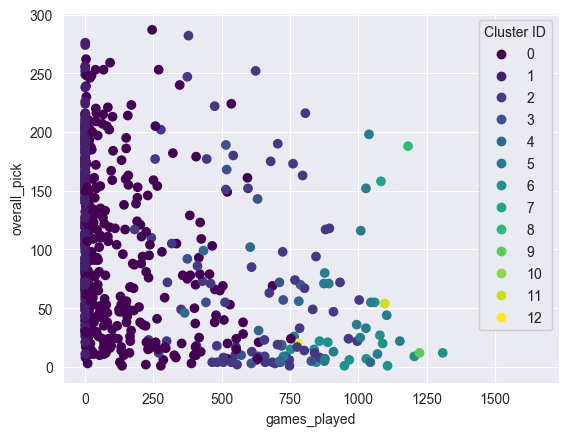

In [571]:
scatter = plt.scatter(mean_shift_clus["games_played"], mean_shift_clus["overall_pick"], c=mean_shift_clus["cluster_id"], cmap="viridis")
plt.xlabel("games_played")
plt.ylabel("overall_pick")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

# --------------------------------
# --------------------------------
# --------------------------------


## DOMINIK WOJNAR

# OLD k-menas for different dataset

## Here I made data scaling

# df_encoded.head()

In [572]:
df_clustering

,year,overall_pick,team,nationality,position,age,to_year,games_played,goals,assists,points,plus_minus,penalties_minutes,goalie_games_played,save_percentage
3660,2005,26,6.0,2.0,11.0,18.0,2014.0,13.0,1.0,3.0,4.0,2.0,38.0,0.0,0.0
345,2021,122,1.0,7.0,7.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4220,2003,65,5.0,14.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11949,1970,21,31.0,2.0,8.0,20.0,1975.0,258.0,58.0,60.0,118.0,-64.0,158.0,0.0,0.0
5229,2000,202,26.0,2.0,4.0,19.0,2008.0,4.0,0.0,0.0,0.0,-2.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,1998,107,40.0,17.0,11.0,19.0,2002.0,8.0,0.0,1.0,1.0,-4.0,6.0,0.0,0.0
629,2020,183,26.0,7.0,4.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2416,2011,48,15.0,8.0,4.0,18.0,2021.0,178.0,5.0,23.0,28.0,-3.0,82.0,0.0,0.0
10653,1978,179,9.0,2.0,8.0,20.0,1987.0,406.0,161.0,118.0,279.0,-11.0,286.0,0.0,0.0


Take a look at the Fare feature distribution
What transformation would be appropriate based on that?

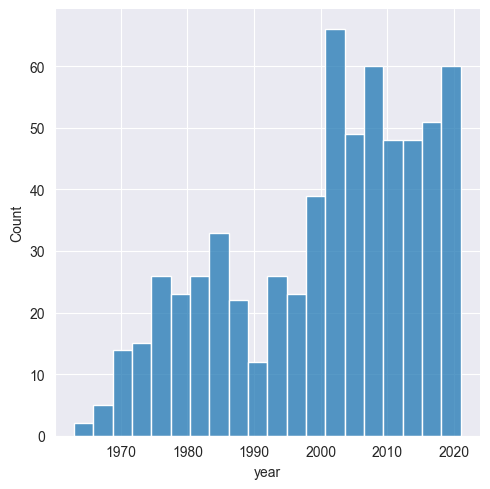

In [573]:
sns.displot(df_clustering.year, bins=20)

## Create encoded variable

In [574]:
df_encoded = pd.DataFrame(index=df_clustering.index)

In [575]:
# Add the year feature into the *df_encoded* dataframe

In [576]:
df_encoded['year'] = sklearn.preprocessing.minmax_scale(df_clustering[['year']])

# Scale

In [577]:
df_encoded

,year
3660,0.724138
345,1.000000
4220,0.689655
11949,0.120690
5229,0.637931
...,...
5699,0.603448
629,0.982759
2416,0.827586
10653,0.258621


In [578]:
df_encoded['overall_pick'] = sklearn.preprocessing.minmax_scale(df_clustering[['overall_pick']])
df_encoded['goals'] = sklearn.preprocessing.minmax_scale(df_clustering[['goals']])
df_encoded['assists'] = sklearn.preprocessing.minmax_scale(df_clustering[['assists']])
df_encoded['to_year'] = sklearn.preprocessing.minmax_scale(df_clustering[['to_year']])
df_encoded['points'] = sklearn.preprocessing.minmax_scale(df_clustering[['points']])
df_encoded

,year,overall_pick,goals,assists,to_year,points
3660,0.724138,0.087413,0.001825,0.003841,0.996044,0.003390
345,1.000000,0.423077,0.000000,0.000000,0.000000,0.000000
4220,0.689655,0.223776,0.000000,0.000000,0.000000,0.000000
11949,0.120690,0.069930,0.105839,0.076825,0.976756,0.100000
5229,0.637931,0.702797,0.000000,0.000000,0.993076,0.000000
...,...,...,...,...,...,...
5699,0.603448,0.370629,0.000000,0.001280,0.990109,0.000847
629,0.982759,0.636364,0.000000,0.000000,0.000000,0.000000
2416,0.827586,0.164336,0.009124,0.029449,0.999505,0.023729
10653,0.258621,0.622378,0.293796,0.151088,0.982690,0.236441


X = df_encoded.values

In [579]:
X = df_encoded.values

In [580]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

In [581]:
df_clustering_scores

,sse,silhouette
k,,
2,99.394209,0.596592
3,73.735127,0.456185
4,57.184804,0.449125
5,42.694516,0.486401
6,38.385042,0.480396
7,31.580834,0.396560
8,29.007928,0.374371
9,27.512936,0.348509
10,25.575528,0.318334


<Axes: xlabel='k', ylabel='sse'>

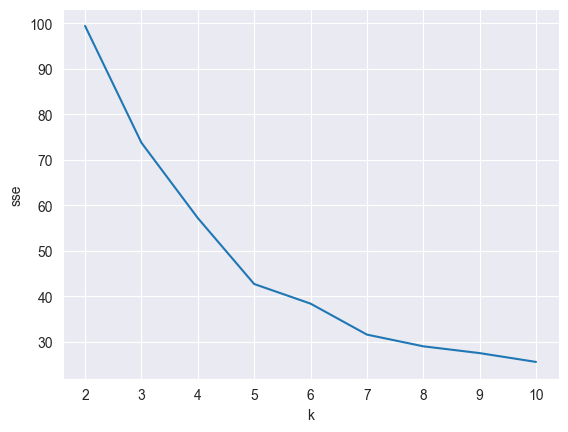

In [582]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

<Axes: xlabel='k', ylabel='silhouette'>

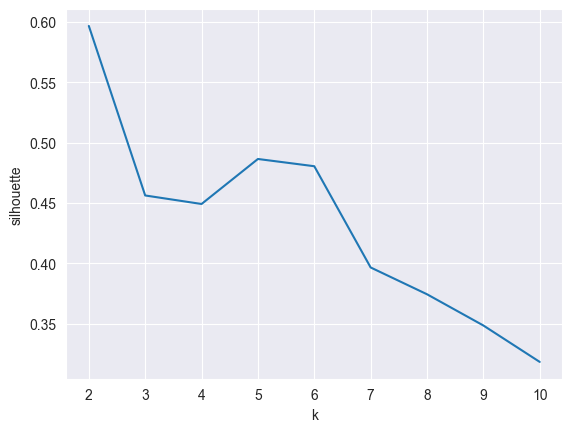

In [583]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

In [584]:
clustering = sklearn.cluster.KMeans(n_clusters=7, random_state=13).fit(X)

In [585]:
pd.Series(clustering.labels_).value_counts()

2    139
6    128
4    108
3    103
1     93
0     57
5     20
Name: count, dtype: int64

In [586]:
df_clustering['cluster_id'] = clustering.labels_
df_clustering.head()

,year,overall_pick,team,nationality,position,age,to_year,games_played,goals,assists,points,plus_minus,penalties_minutes,goalie_games_played,save_percentage,cluster_id
3660,2005,26,6.0,2.0,11.0,18.0,2014.0,13.0,1.0,3.0,4.0,2.0,38.0,0.0,0.0,2
345,2021,122,1.0,7.0,7.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4220,2003,65,5.0,14.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11949,1970,21,31.0,2.0,8.0,20.0,1975.0,258.0,58.0,60.0,118.0,-64.0,158.0,0.0,0.0,3
5229,2000,202,26.0,2.0,4.0,19.0,2008.0,4.0,0.0,0.0,0.0,-2.0,4.0,0.0,0.0,4


<Axes: xlabel='cluster_id', ylabel='count'>

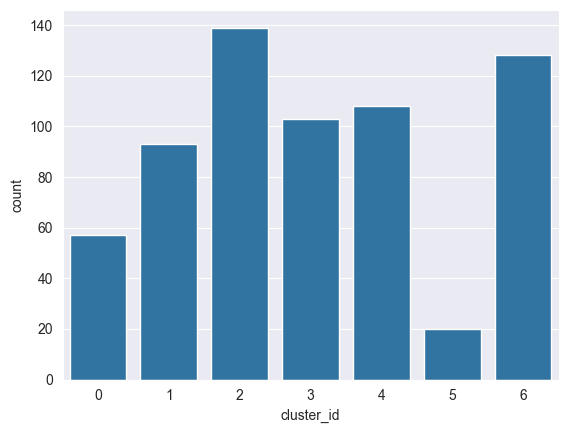

In [587]:
sns.countplot(data=df_clustering, x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='year'>

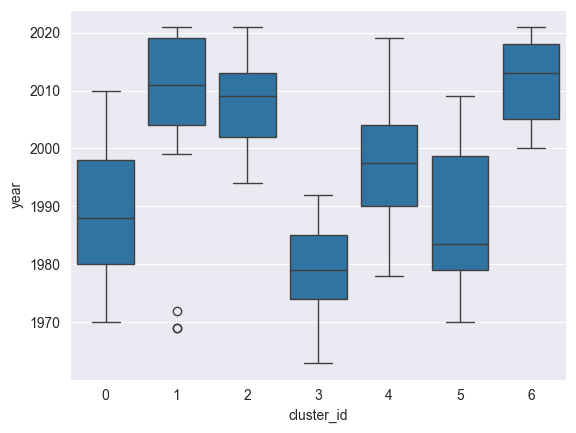

In [588]:
# lOG helped as to see clearly years even when years has big range from 1950 till 2022
sns.boxplot(data=df_clustering, x='cluster_id', y='year')
# plt.yscale('log')

<Axes: xlabel='cluster_id', ylabel='goals'>

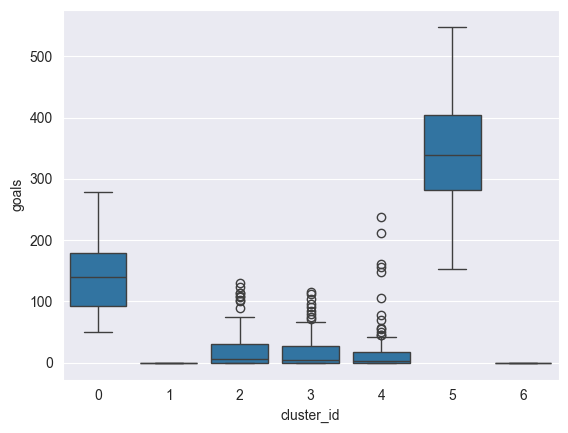

In [589]:
sns.boxplot(data=df_clustering, x='cluster_id', y='goals')

<Axes: xlabel='cluster_id', ylabel='assists'>

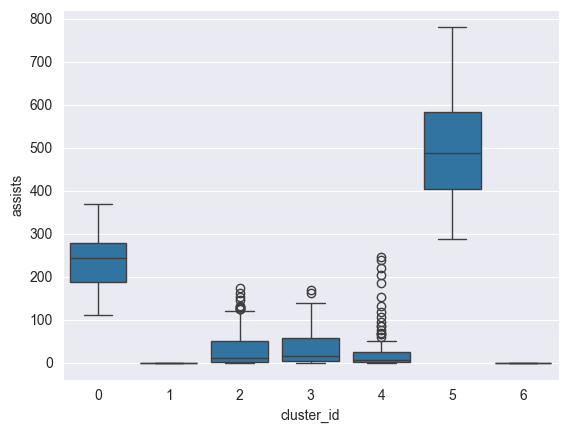

In [590]:
sns.boxplot(data=df_clustering, x='cluster_id', y='assists')

<Axes: xlabel='cluster_id', ylabel='overall_pick'>

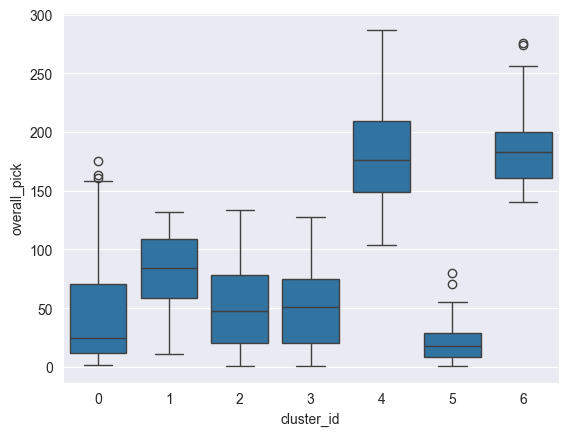

In [591]:
sns.boxplot(data=df_clustering, x='cluster_id', y='overall_pick')

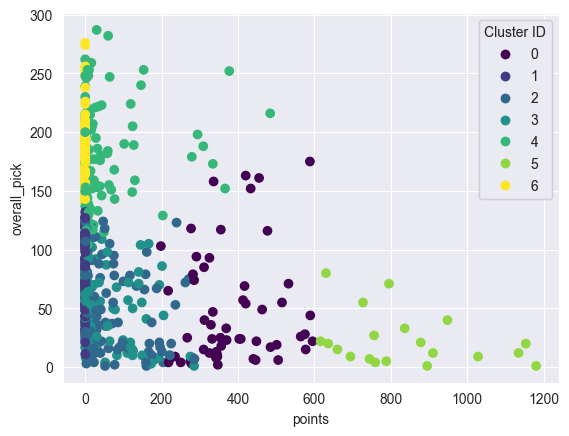

In [592]:
scatter = plt.scatter(df_clustering["points"], df_clustering["overall_pick"], c=df_clustering["cluster_id"], cmap="viridis")
plt.xlabel("points")
plt.ylabel("overall_pick")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

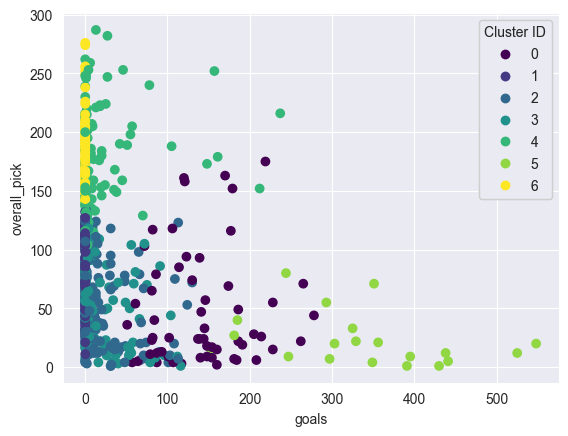

In [593]:
scatter = plt.scatter(df_clustering["goals"], df_clustering["overall_pick"], c=df_clustering["cluster_id"], cmap="viridis")
plt.xlabel("goals")
plt.ylabel("overall_pick")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

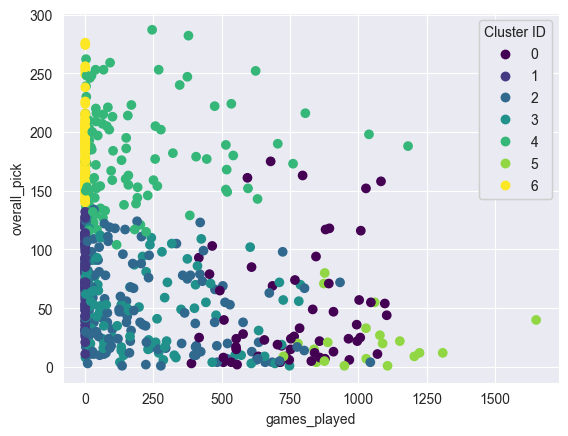

In [594]:
scatter = plt.scatter(df_clustering["games_played"], df_clustering["overall_pick"], c=df_clustering["cluster_id"], cmap="viridis")
plt.xlabel("games_played")
plt.ylabel("overall_pick")
legend = plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.gca().add_artist(legend)
plt.show()

# Part 2
# Agglomerative clustering
### I will make aglomerative clustering onb

In [595]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Credit to https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.ylabel('distance')

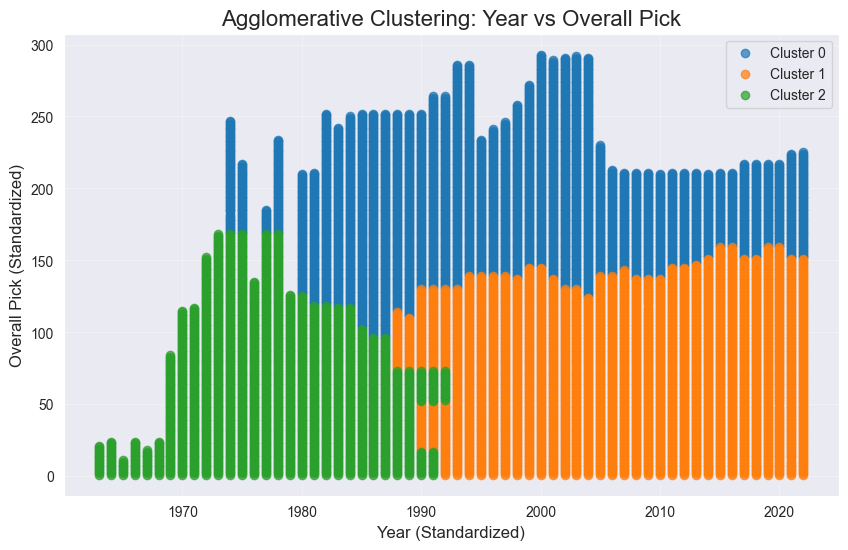

In [596]:
# Select the features 'year' and 'overall_pick'
X = df[['year', 'overall_pick']].dropna()

# Standardize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Agglomerative Clustering
n_clusters = 3  # Adjust based on dendrogram or domain knowledge
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)

# Add cluster labels to the dataset
X['Cluster'] = clusters

# Scatterplot with clusters
# plt.style.use('dark_background')  # Dark background like the example
plt.figure(figsize=(10, 6))

for cluster in range(n_clusters):
    cluster_data = X[X['Cluster'] == cluster]
    plt.scatter(cluster_data['year'], cluster_data['overall_pick'], label=f'Cluster {cluster}', alpha=0.7)

plt.title("Agglomerative Clustering: Year vs Overall Pick", fontsize=16)
plt.xlabel("Year (Standardized)", fontsize=12)
plt.ylabel("Overall Pick (Standardized)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


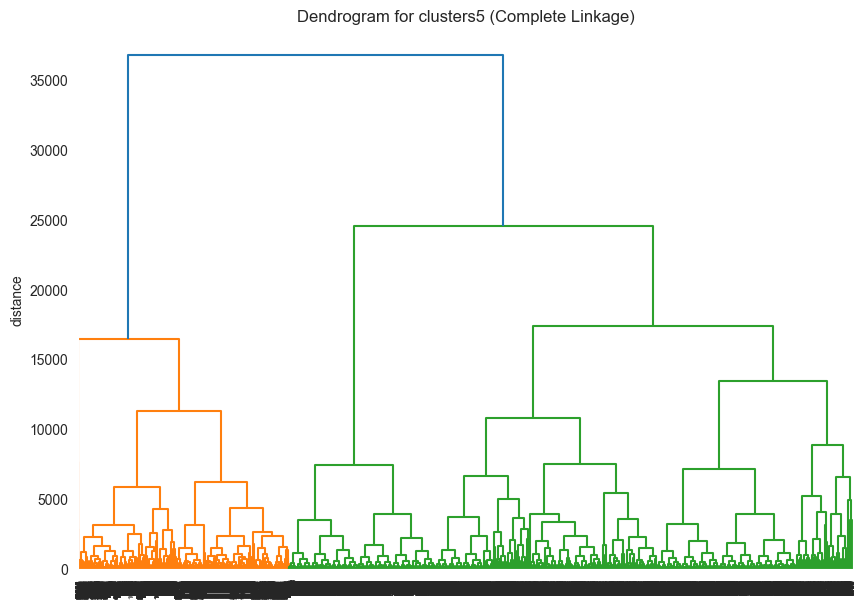

In [597]:
# Perform hierarchical clustering and create a dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

clustering_complete_clusters5 = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering_complete_clusters5.fit(linkage_matrix)

# plt.style.use('dark_background') 
plt.figure(figsize=(10, 7))
plot_dendrogram(clustering_complete_clusters5)
plt.title("Dendrogram for clusters5 (Complete Linkage)")
plt.show()

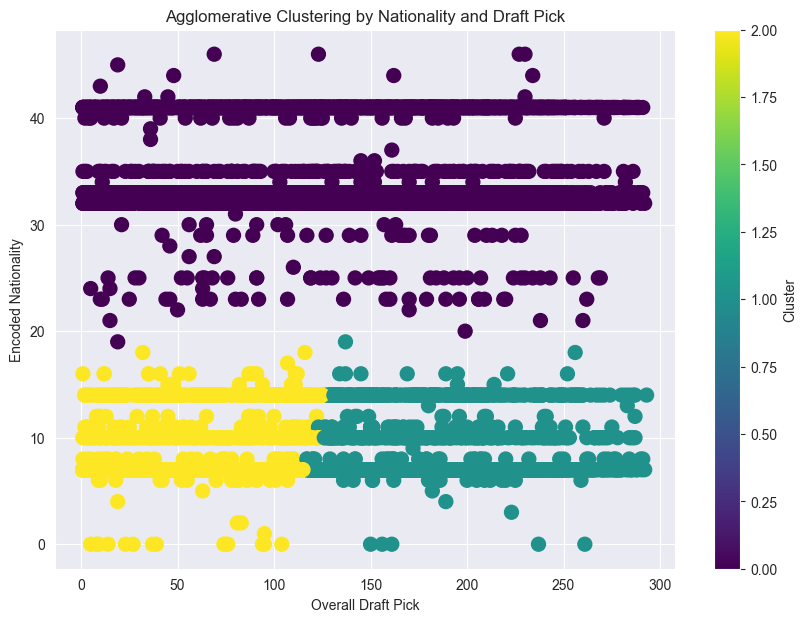

      nationality  overall_pick  nationality_encoded  cluster
0              SK             1                   35        0
1              SK             2                   35        0
2              US             3                   41        0
3              CA             4                    7        2
4              SE             5                   33        0
...           ...           ...                  ...      ...
12245          CA            17                    7        2
12246          CA            18                    7        2
12247          CA            19                    7        2
12248          CA            20                    7        2
12249          CA            21                    7        2

[12250 rows x 4 columns]


In [598]:
from sklearn.preprocessing import LabelEncoder

# Example NHL data (replace with your full dataset if needed)
data_clusters_1 = pd.read_csv("nhl_filtered_agglomerative_1.csv")

# Step 1: Encode nationality
label_encoder = LabelEncoder()
data_clusters_1['nationality_encoded'] = label_encoder.fit_transform(data_clusters_1['nationality'])

# Step 2: Select features for clustering
features = data_clusters_1[['nationality_encoded', 'overall_pick']]

# Step 3: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
data_clusters_1['cluster'] = clustering.fit_predict(scaled_features)

# Step 5: Visualize the Clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_clusters_1['overall_pick'], data_clusters_1['nationality_encoded'], c=data_clusters_1['cluster'], cmap='viridis', s=100)
plt.title('Agglomerative Clustering by Nationality and Draft Pick')
plt.xlabel('Overall Draft Pick')
plt.ylabel('Encoded Nationality')
plt.colorbar(label='Cluster')
plt.show()

# Print cluster assignments
print(data_clusters_1)

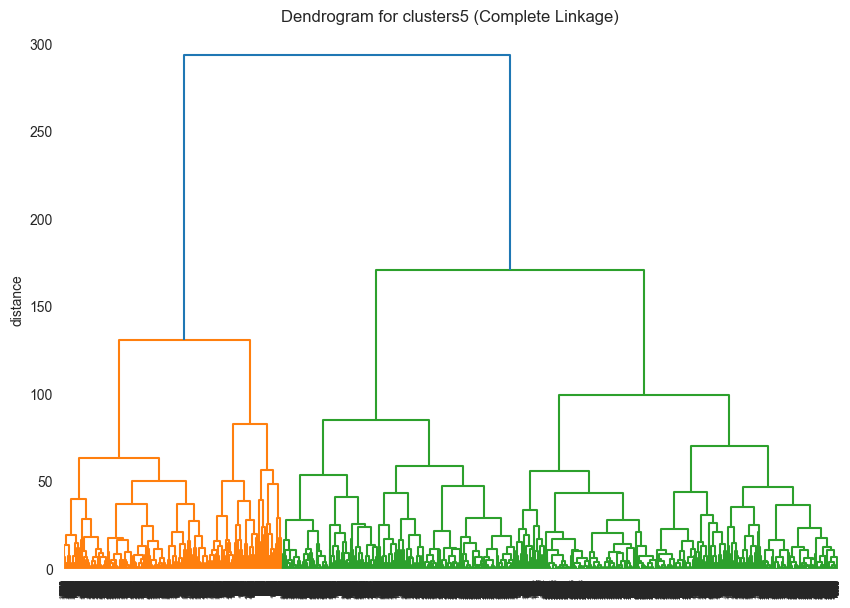

In [599]:
clustering_complete_clusters5 = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering_complete_clusters5.fit(features)

# plt.style.use('dark_background') 
plt.figure(figsize=(10, 7))
plot_dendrogram(clustering_complete_clusters5)
plt.title("Dendrogram for clusters5 (Complete Linkage)")
plt.show()